9/1/2020:  I've finalized luminosities/errors and corrected VLASS sources' flux densitities accordingly and am now returning to re-do a more robust version of our light curve analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import richardsplot
from astropy.cosmology import FlatLambdaCDM
import scipy.stats as spstats
import datetime as dt
import matplotlib.dates as mdates

In [2]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [3]:
def radluminosity(nu1, nu2, S_nu2, alpha, z):
    #calculate luminosity at nu1 based on data at nu2
    #input flux density units are µJy
    DL = 3.086e24*cosmo.luminosity_distance(z).value
    L = ((4*np.pi*DL**2*(S_nu2*1e-23*1e-6)) / ((1+z)**(1+alpha))) * (nu1/nu2)**alpha * 1e-7
    return np.log10(L)

def isNAN(arr):
    #this isnan works for strings too; np.isnan(a) only works if all elements
    #is arr are floats
    return arr!=arr

In [4]:
df = pd.read_csv("all_var_figs.csv")
df

Name      z  S1p4_FIRST  S1p4_err     S6_FIRST  \
0   075403.60+481428.0  0.276        7910       160  2856.013350   
1   083658.90+442602.2  0.254        9150       120  3303.732257   
2   091702.11+212337.5  0.202        4190       130  1512.856629   
3   094215.12+090015.8  0.213        1690       130   610.197543   
4   094603.94+013923.6  0.220        7330       150  2646.596442   
..                 ...    ...         ...       ...          ...   
64  145824.46+363119.5  0.246         495         0   178.726499   
65  084313.41+535718.8  0.218         516       150   186.308835   
66  123532.83+410445.1  0.212         510         0   184.142454   
67  161723.67+085414.7  0.206         450         0   162.478636   
68  142522.37+080327.1  0.230         366         0   132.149290   

    S6_FIRST_err  S6_FIRST_alpha0  S6_FIRST_alpha0_err   L6_FIRST  \
0      57.770182           7910.0                160.0  23.800933   
1      43.327636           9150.0                120.0  23.784059   
2      46.938273           4190.0                130.0  23.225996   
3      46.938273           1690.0                130.0  22.882062   
4      54.159545           7330.0                150.0  23.550088   
..           ...              ...                  ...        ...   
64      0.000000            495.0                  0.0  22.486485   
65     54.159545            516.0                150.0  22.388927   
66      0.000000            510.0                  0.0  22.357267   
67      0.000000            450.0                  0.0  22.275612   
68      0.000000            366.0                  0.0  22.290917   

    L6_FIRST_alpha0  ...  L6_Kell_lolim   DATE_VLAC S6_Aconfig  \
0         24.169254  ...       0.014228   2011-1-15        NaN   
1         24.157667  ...       0.013421   2011-1-15        NaN   
2         23.612479  ...       0.013294   2011-1-15        NaN   
3         23.265776  ...       0.014594   2011-1-15        NaN   
4         23.932053  ...       0.013585   2011-1-15        NaN   
..              ...  ...            ...         ...        ...   
64        22.862038  ...       0.025160  2010-12-25      207.0   
65        22.771390  ...       0.015857  2010-12-26      349.0   
66        22.741231  ...       0.027115  2010-12-27      554.0   
67        22.661085  ...       0.017681  2010-12-28      386.7   
68        22.670400  ...       0.020953  2010-12-29      220.0   

    S6_Aconfig_err  L6_Aconfig  L6_Aconfig_alpha0  L6_Aconfig_uplim  \
0              NaN    0.000000           0.000000          0.000000   
1              NaN    0.000000           0.000000          0.000000   
2              NaN    0.000000           0.000000          0.000000   
3              NaN    0.000000           0.000000          0.000000   
4              NaN    0.000000           0.000000          0.000000   
..             ...         ...                ...               ...   
64       31.000000   22.550266          22.483403          0.060607   
65       31.000000   22.661519          22.601566          0.036958   
66       67.000000   22.835623          22.777171          0.049582   
67       18.164801   22.652190          22.595246          0.019936   
68       15.000000   22.512275          22.449341          0.028645   

    L6_Aconfig_lolim   DATE_VLAA  CLASS  
0           0.000000    2021-1-1     RI  
1           0.000000    2021-1-2     RI  
2           0.000000    2021-1-3     RI  
3           0.000000    2021-1-4     RI  
4           0.000000    2021-1-5     RI  
..               ...         ...    ...  
64         -0.070458  2019-09-20     RQ  
65         -0.040398  2019-08-13     RQ  
66         -0.055981  2019-08-13     RQ  
67         -0.020895  2019-08-20     RQ  
68         -0.030669  2019-08-17     RQ  

[69 rows x 41 columns]

In [5]:
sdss_names = df[["Name"]].values.flatten()
z = df[["z"]].values.flatten()
RQ = df[["CLASS"]].values.flatten()=="RQ"
RI = df[["CLASS"]].values.flatten()=="RI"
RL = df[["CLASS"]].values.flatten()=="RL"

In [6]:
L6_Aconfig = df[["L6_Aconfig"]].values.flatten()
L6_Aconfigup = df[["L6_Aconfig_alpha0"]].values.flatten()
L6_Aconfig_uplim = df[["L6_Aconfig_uplim"]].values.flatten()
L6_Aconfig_lolim = df[["L6_Aconfig_lolim"]].values.flatten()
Lnu_Aconfig_err = np.array([L6_Aconfig_lolim, L6_Aconfig_uplim])
L6_Aconfig_err = Lnu_Aconfig_err.T

In [7]:
L6_first = df[["L6_FIRST"]].values.flatten()
L6_firstup = df[["L6_FIRST_alpha0"]].values.flatten()
L6_first_uplim = df[["L6_FIRST_uplim"]].values.flatten()
L6_first_lolim = df[["L6_FIRST_lolim"]].values.flatten()
Lnu_first_err = np.array([L6_first_lolim, L6_first_uplim])
L6_first_err = Lnu_first_err.T 
dates_first = df[["DATE_FIRST"]].values.flatten()

L6_kell = df[["L6_Kell"]].values.flatten()
L6_kellup = df[["L6_Kell_alpha0"]].values.flatten()
L6_kell_uplim = df[["L6_Kell_uplim"]].values.flatten()
L6_kell_lolim = df[["L6_Kell_lolim"]].values.flatten()
Lnu_kell_err = np.array([L6_kell_lolim, L6_kell_uplim])
L6_kell_err = Lnu_kell_err.T 
dates_kell = df[["DATE_VLAC"]].values.flatten()

L6_vlass = df[["L6_VLASS"]].values.flatten()
L6_vlassup = df[["L6_VLASS_alpha0"]].values.flatten()
L6_vlass_uplim = df[["L6_VLASS_uplim"]].values.flatten()
L6_vlass_lolim = df[["L6_VLASS_lolim"]].values.flatten()
Lnu_vlass_err = np.array([L6_vlass_lolim, L6_vlass_uplim])
L6_vlass_err = Lnu_vlass_err.T
dates_vlass = df[["DATE_VLASS"]].values.flatten()

L6_Aconfig = df[["L6_Aconfig"]].values.flatten()
L6_Aconfigup = df[["L6_Aconfig_alpha0"]].values.flatten()
L6_Aconfig_uplim = df[["L6_Aconfig_uplim"]].values.flatten()
L6_Aconfig_lolim = abs(df[["L6_Aconfig_lolim"]].values.flatten())
Lnu_Aconfig_err = np.array([L6_Aconfig_lolim, L6_Aconfig_uplim])
L6_Aconfig_err = Lnu_Aconfig_err.T
dates_Aconfig = df[["DATE_VLAA"]].values.flatten()

In [8]:
#Array of luminosities
data = np.array([L6_first, L6_kell, L6_vlass, L6_Aconfig]).T
dataup = np.array([L6_firstup, L6_kellup, L6_vlassup, L6_Aconfigup]).T

#Arrays of errors
errs_rq = np.array([L6_first_err[RQ], L6_kell_err[RQ], L6_Aconfig_err[RQ]])
errs_ri = np.array([L6_first_err[RI], L6_kell_err[RI], L6_vlass_err[RI]])
errs_rl = np.array([L6_first_err[RL], L6_kell_err[RL], L6_vlass_err[RL]])

#Array of dates
dates = np.array([dates_first, dates_kell, dates_vlass, dates_Aconfig]).T
for i in range(dates.shape[0]): #format dates for plotting
    for j in range(dates.shape[1]):
        dates[i,j] = dt.datetime.strptime(dates[i,j],'%Y-%m-%d').date()

In [9]:
novlass = np.array([True, True, False, True])

In [10]:
data

array([[23.80093306, 23.76529368, 23.77747   ,  0.        ],
       [23.78405931, 23.67935915, 23.68325345,  0.        ],
       [23.22599631, 23.72653405, 23.49111532,  0.        ],
       [22.88206205, 23.16179773, 23.06051179,  0.        ],
       [23.5500884 , 23.52027342, 23.55830249,  0.        ],
       [22.4411812 , 23.40878627, 22.53817788,  0.        ],
       [23.14259717, 23.08209577, 23.20687969,  0.        ],
       [23.2257063 , 23.12560834, 23.07460488,  0.        ],
       [23.05121469, 23.17682406, 23.06199919,  0.        ],
       [23.01505721, 23.03574178, 23.1042446 ,  0.        ],
       [23.08671916, 23.16188185, 23.16545798,  0.        ],
       [23.42985476, 23.75153266, 23.60110757,  0.        ],
       [23.1276594 , 23.13420028, 23.24177973,  0.        ],
       [23.46624946, 23.48320463, 23.37343363,  0.        ],
       [23.41734015, 23.51850657, 23.38265081,  0.        ],
       [23.43876443, 23.52244573, 23.49531636,  0.        ],
       [22.79359015, 23.

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


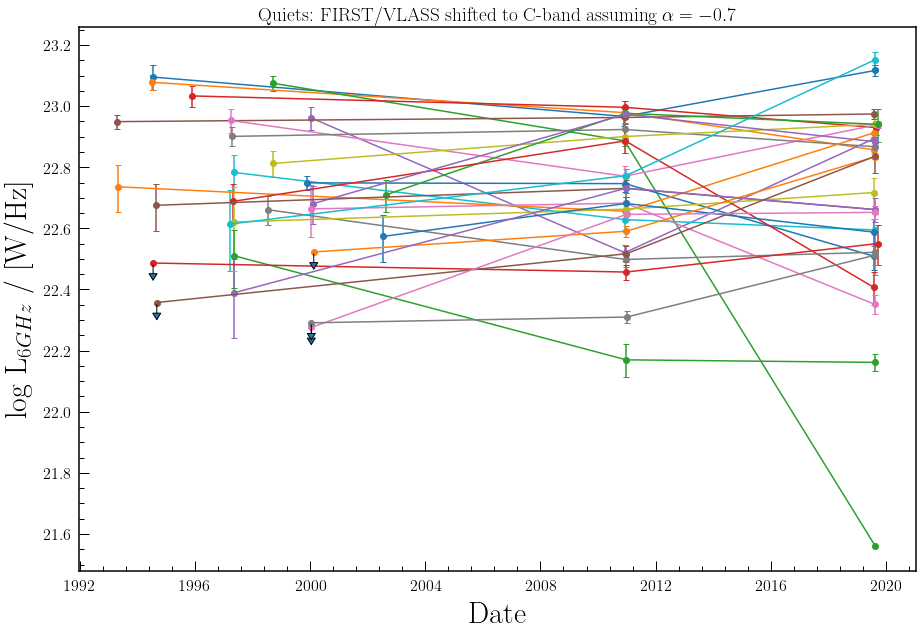

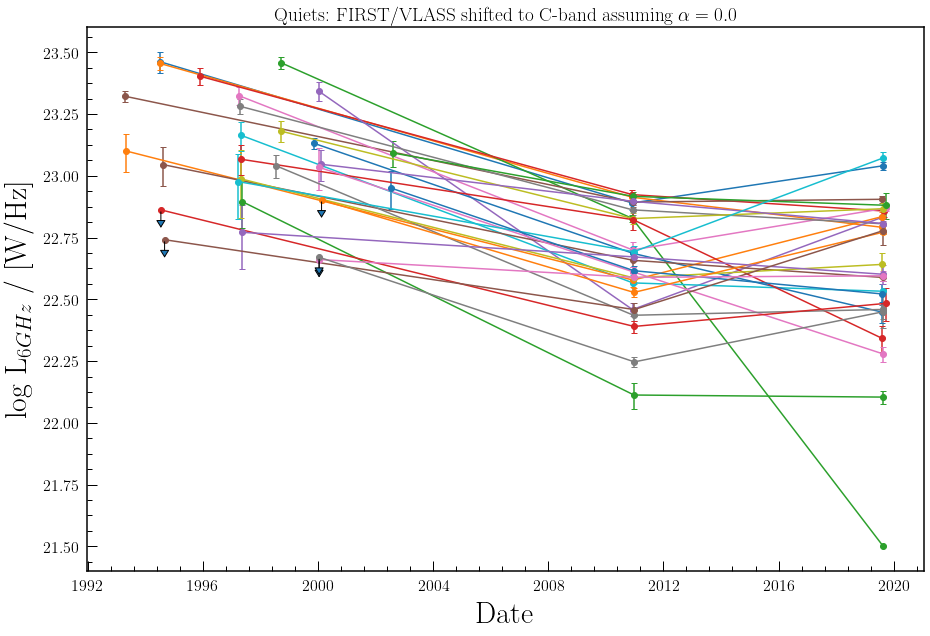

In [11]:
fig = plt.figure(figsize=(15,10))

for i in range(data[RQ].shape[0]):
    plt.errorbar(x=dates[RQ][i][novlass], y=data[RQ][i][novlass], yerr=errs_rq[:,i].T, 
                 fmt="-o", capsize=2.8)
    
    if (errs_rq[0][i]==0.).all():
        plt.annotate('', xy=(dates[RQ][i][0], data[RQ][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Quiets: FIRST/VLASS shifted to C-band assuming $\\alpha=-0.7$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()



fig = plt.figure(figsize=(15,10))

for i in range(dataup[RQ].shape[0]):
    plt.errorbar(x=dates[RQ][i][novlass], y=dataup[RQ][i][novlass], yerr=errs_rq[:,i].T, 
                 fmt="-o", capsize=2.8)
    
    if (errs_rq[0][i]==0.).all():
        plt.annotate('', xy=(dates[RQ][i][0], dataup[RQ][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Quiets: FIRST/VLASS shifted to C-band assuming $\\alpha=0.0$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()

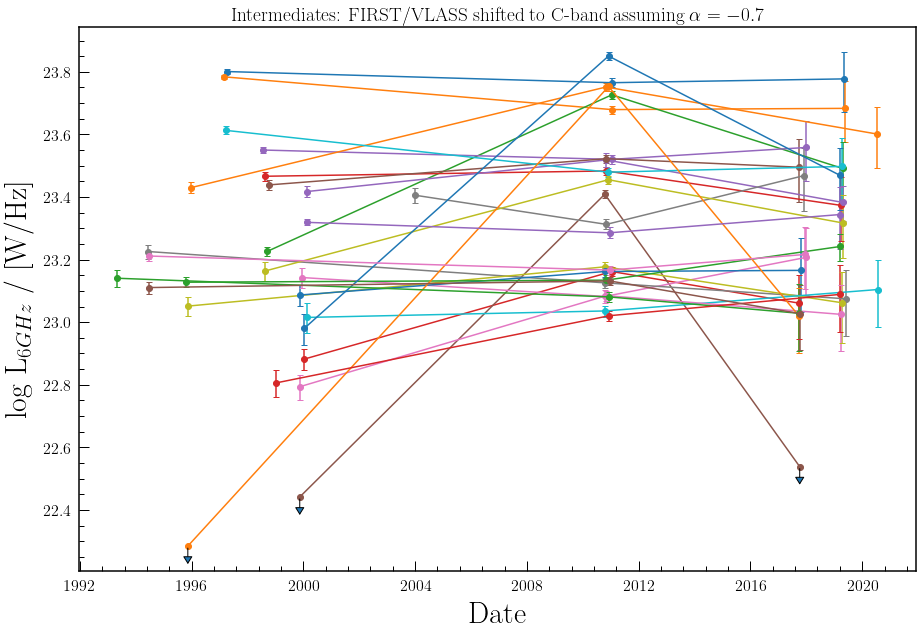

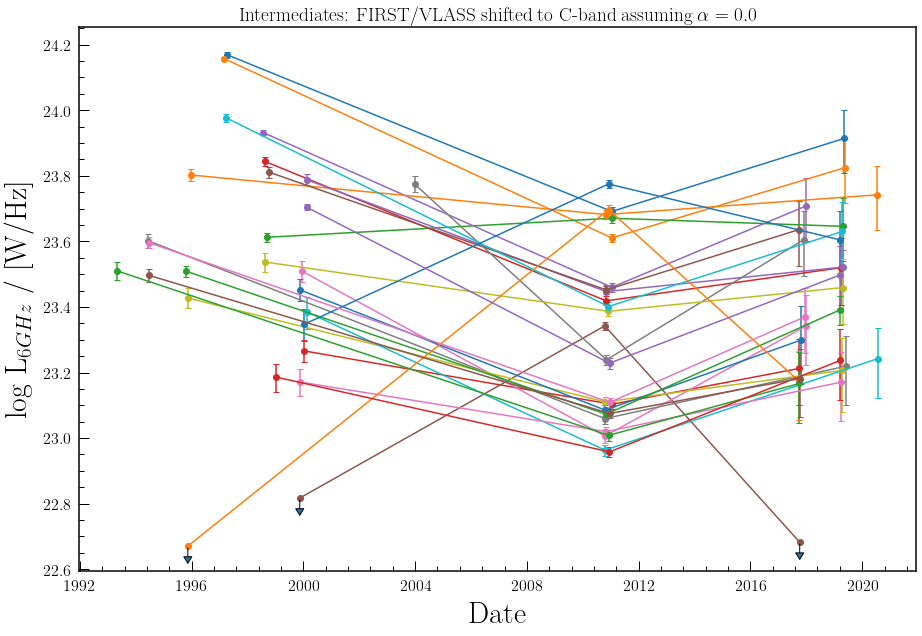

In [12]:
fig = plt.figure(figsize=(15,10))

for i in range(data[RI].shape[0]):
    plt.errorbar(x=dates[RI][i,:3], y=data[RI][i,:3], yerr=errs_ri[:,i].T, 
                 fmt="-o", capsize=2.8)
    
    #Check if FIRST is a non-detection
    if (errs_ri[0][i]==0.).all():
        plt.annotate('', xy=(dates[RI][i][0], data[RI][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
     
    #Check if VLASS is a non-detection
    if (errs_ri[2][i]==0.).all():
        plt.annotate('', xy=(dates[RI][i][2], data[RI][i][2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Intermediates: FIRST/VLASS shifted to C-band assuming $\\alpha=-0.7$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()



fig = plt.figure(figsize=(15,10))

for i in range(dataup[RI].shape[0]):
    plt.errorbar(x=dates[RI][i,:3], y=dataup[RI][i,:3], yerr=errs_ri[:,i].T, 
                 fmt="-o", capsize=2.8)
    
    #Check if FIRST is a non-detection
    if (errs_ri[0][i]==0.).all():
        plt.annotate('', xy=(dates[RI][i][0], dataup[RI][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
     
    #Check if VLASS is a non-detection
    if (errs_ri[2][i]==0.).all():
        plt.annotate('', xy=(dates[RI][i][2], dataup[RI][i][2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Intermediates: FIRST/VLASS shifted to C-band assuming $\\alpha=0.0$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()

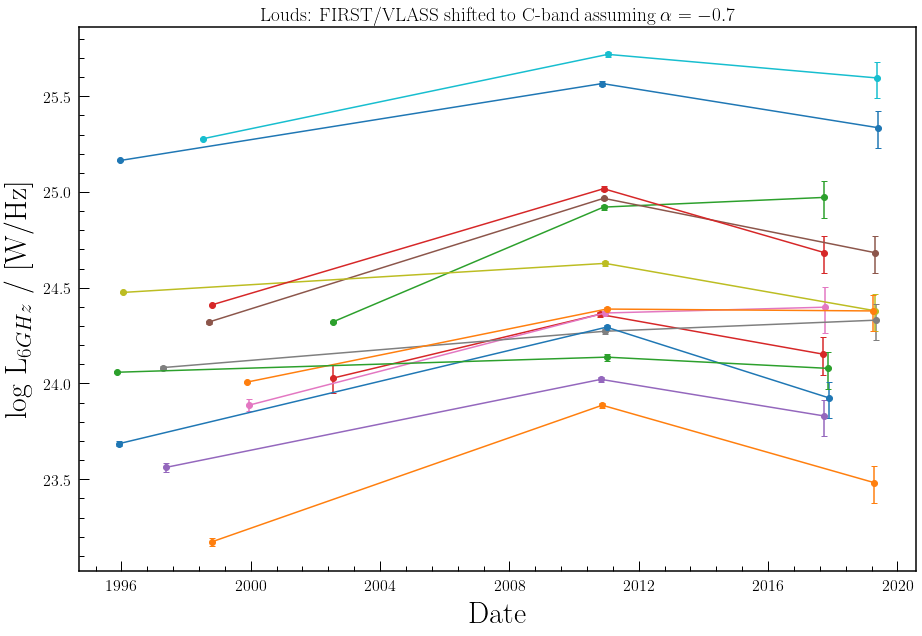

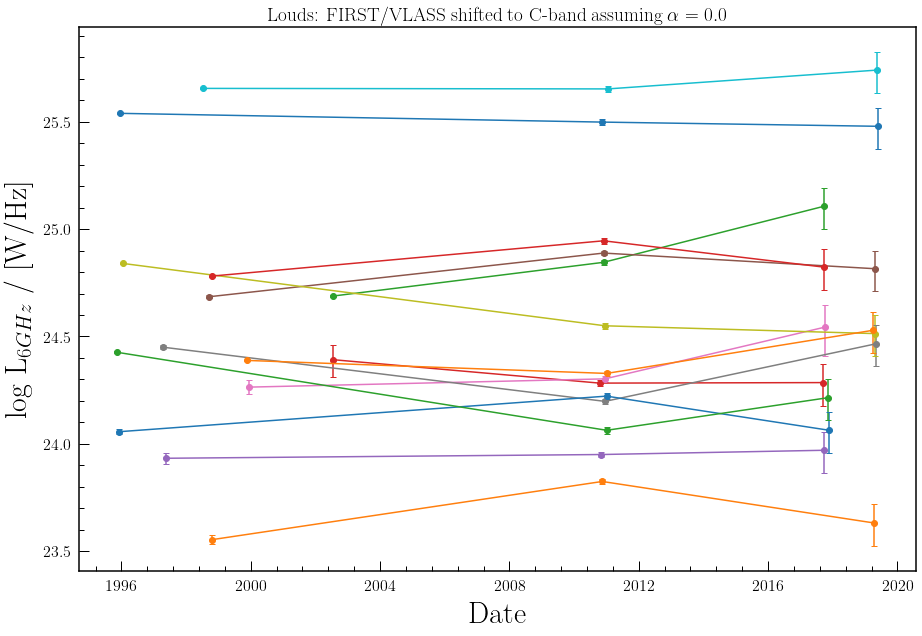

In [13]:
fig = plt.figure(figsize=(15,10))

for i in range(data[RL].shape[0]):
    plt.errorbar(x=dates[RL][i,:3], y=data[RL][i,:3], yerr=errs_rl[:,i].T, 
                 fmt="-o", capsize=2.8)
    
    #Check if FIRST is a non-detection
    if (errs_rl[0][i]==0.).all():
        plt.annotate('', xy=(dates[RL][i][0], data[RL][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
     
    #Check if VLASS is a non-detection
    if (errs_rl[2][i]==0.).all():
        plt.annotate('', xy=(dates[RL][i][2], data[RL][i][2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Louds: FIRST/VLASS shifted to C-band assuming $\\alpha=-0.7$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()



fig = plt.figure(figsize=(15,10))

for i in range(dataup[RL].shape[0]):
    plt.errorbar(x=dates[RL][i,:3], y=dataup[RL][i,:3], yerr=errs_rl[:,i].T, 
                 fmt="-o", capsize=2.8)
    
    #Check if FIRST is a non-detection
    if (errs_rl[0][i]==0.).all():
        plt.annotate('', xy=(dates[RL][i][0], dataup[RL][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
     
    #Check if VLASS is a non-detection
    if (errs_rl[2][i]==0.).all():
        plt.annotate('', xy=(dates[RL][i][2], dataup[RL][i][2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Louds: FIRST/VLASS shifted to C-band assuming $\\alpha=0.0$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()

---
## Now do the $\chi^2$ fits

#### RQ first

In [14]:
#Can save the recorded spectral indinces here
alpha = np.zeros(len(data))

#Need to convert the dates to "raw" years to do the fits to the light curves
dates_fit = np.array([]).reshape(0,4)
for i in range(len(dates)):
    dates_fit_i = np.zeros(len(dates[i]))
    for j in range(len(dates[i])):
        dates_fit_i[j] = dates[i][j].year+(dates[i][j].month-1)/12+dates[i][j].day/365.25
    dates_fit = np.vstack((dates_fit, dates_fit_i))

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


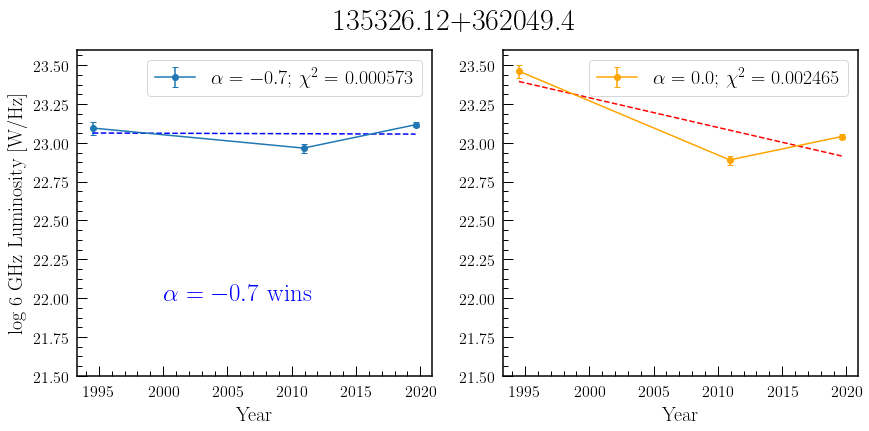

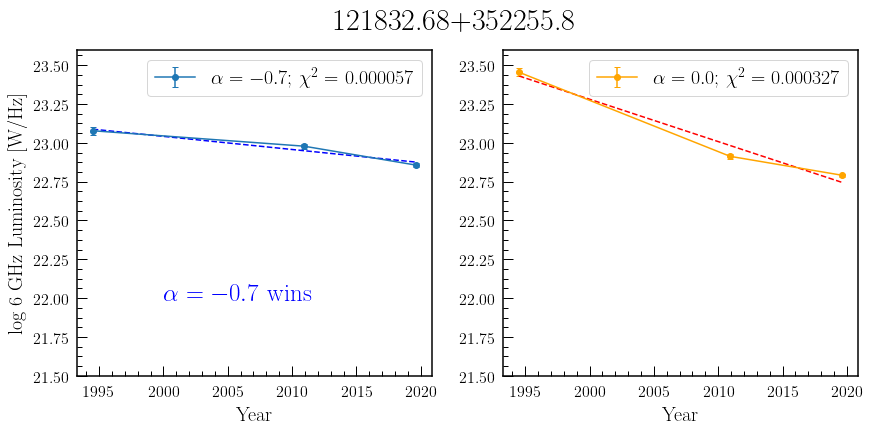

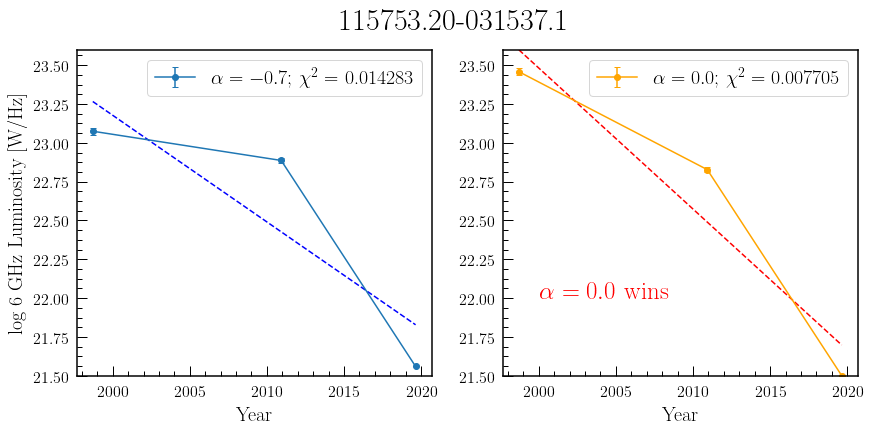

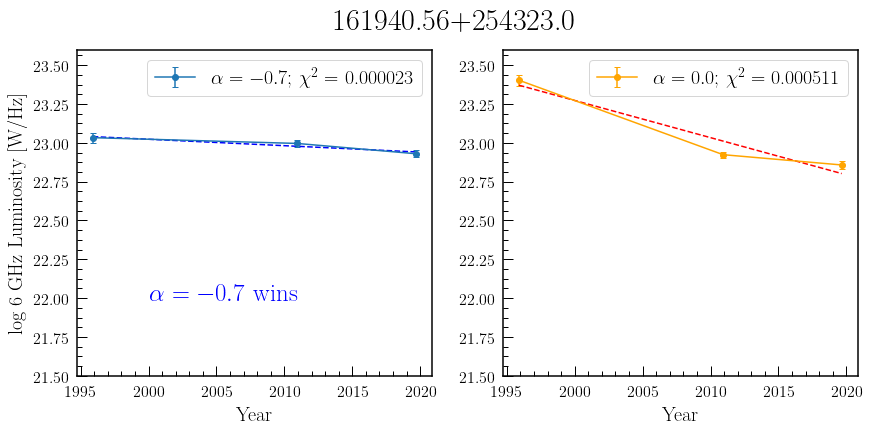

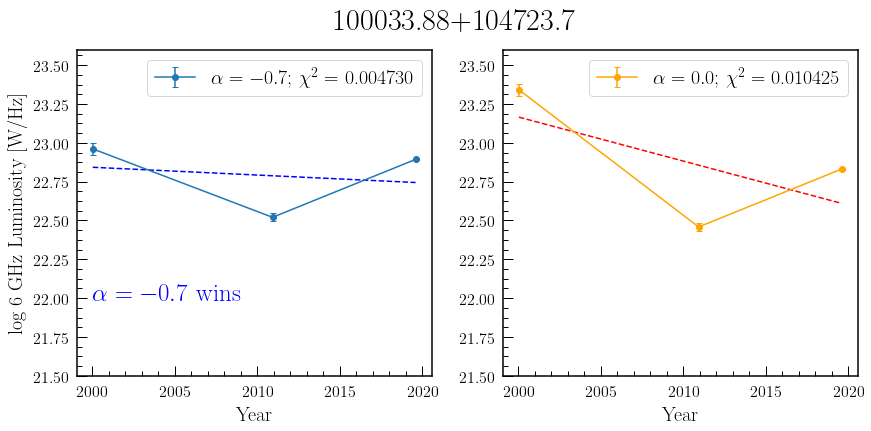

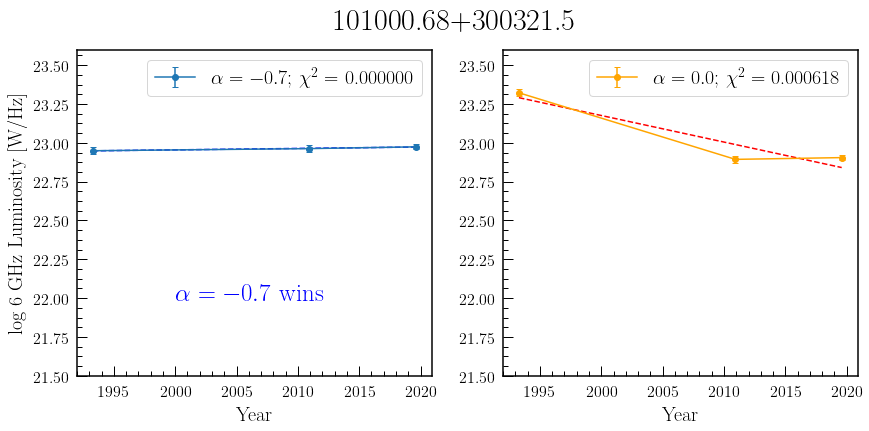

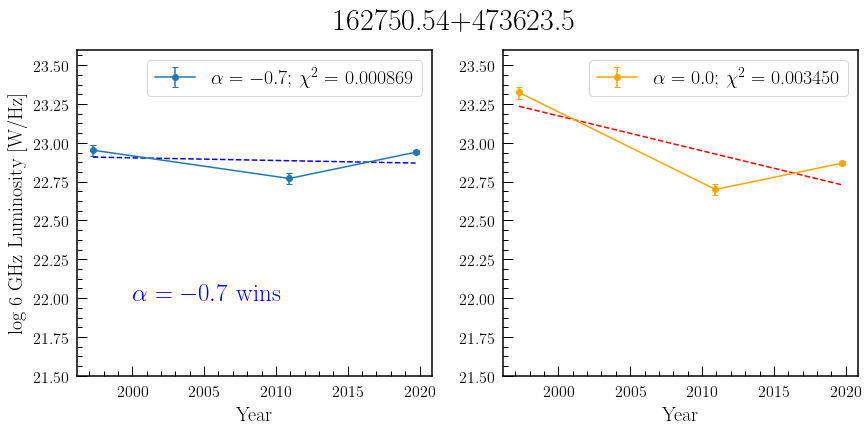

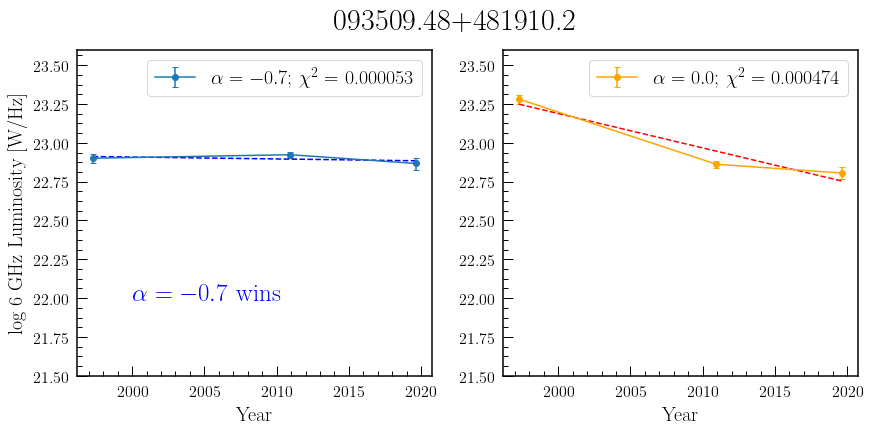

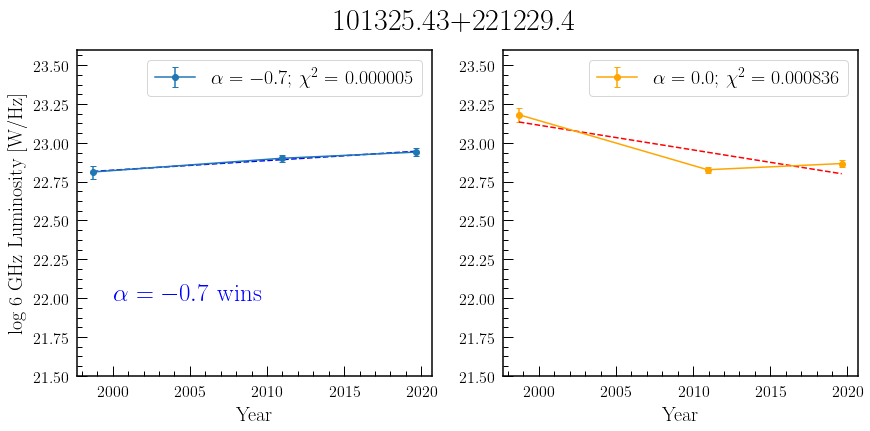

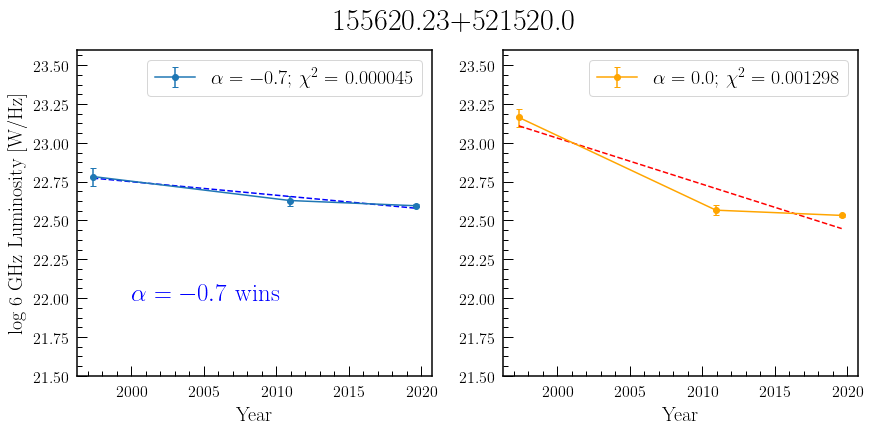

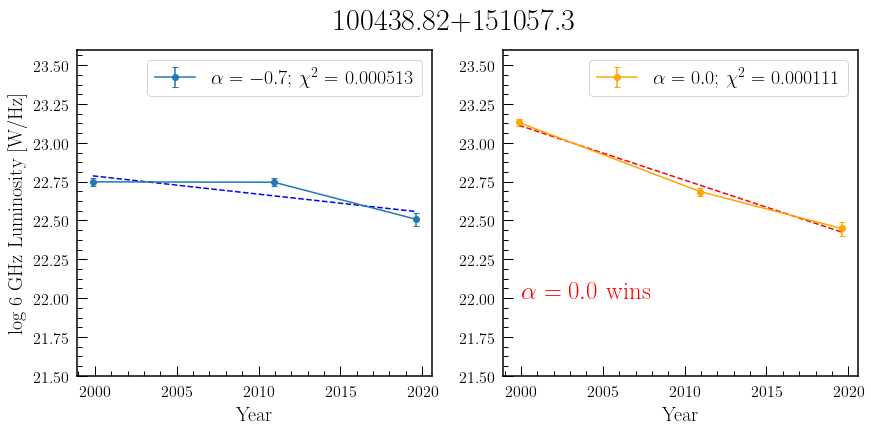

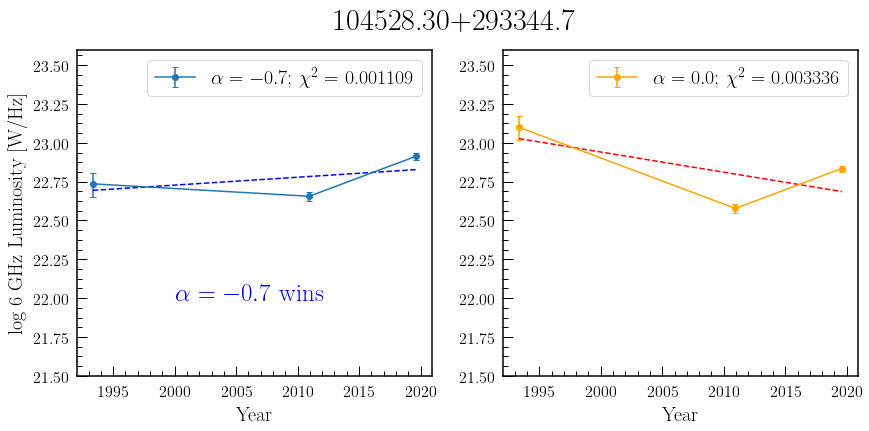

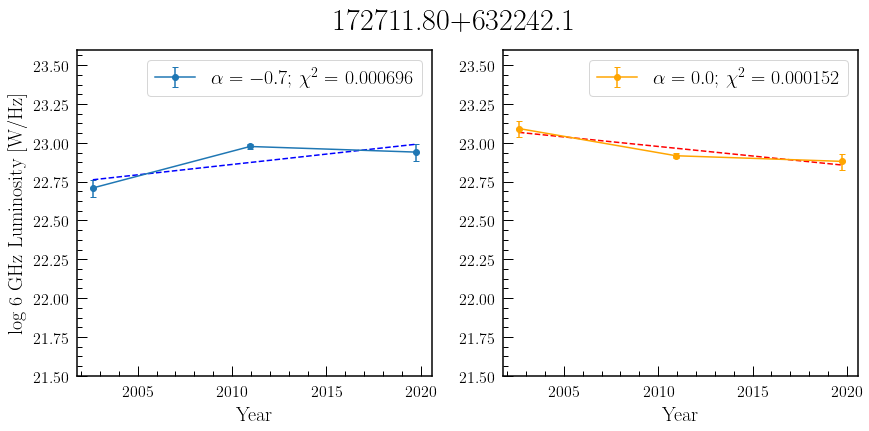

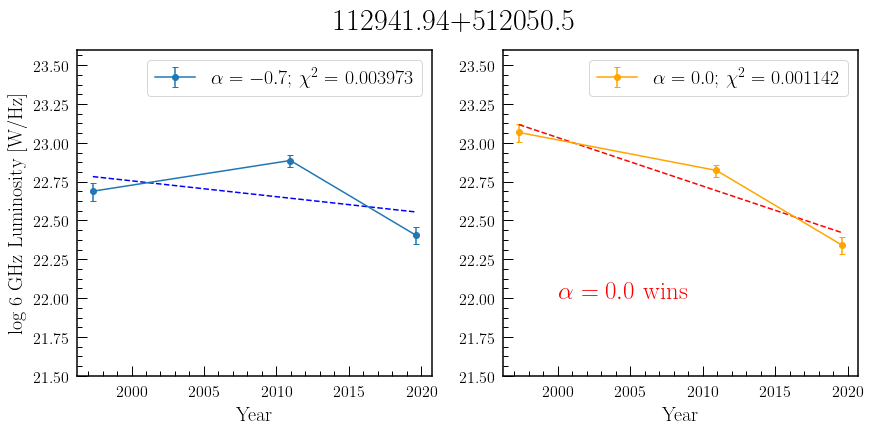

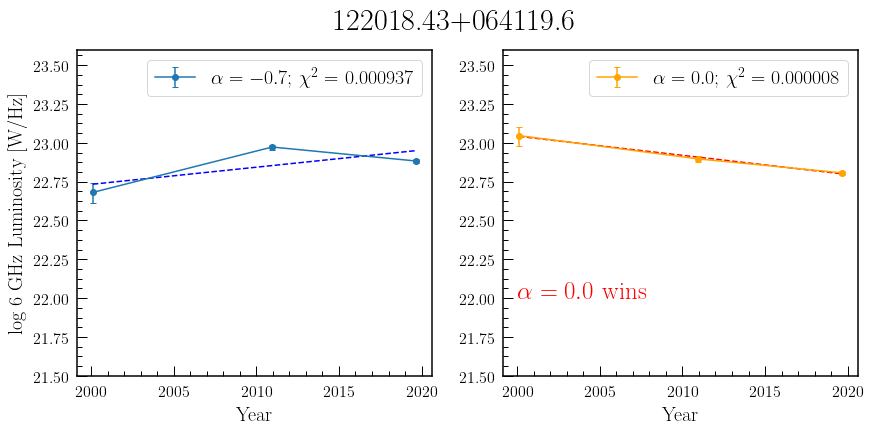

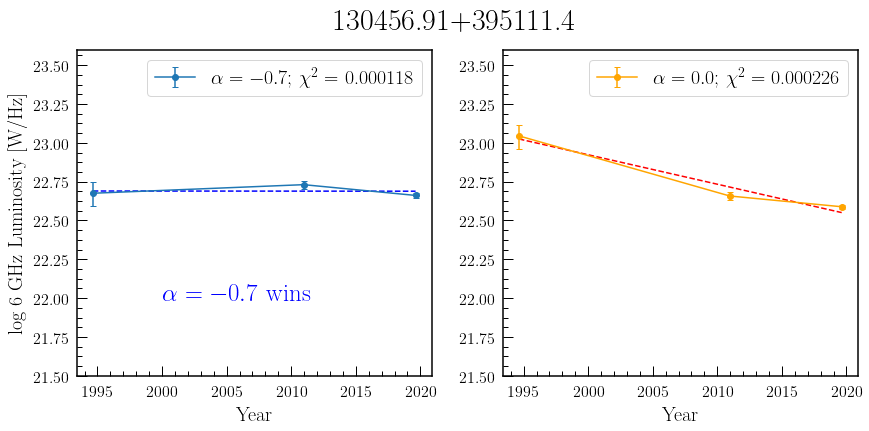

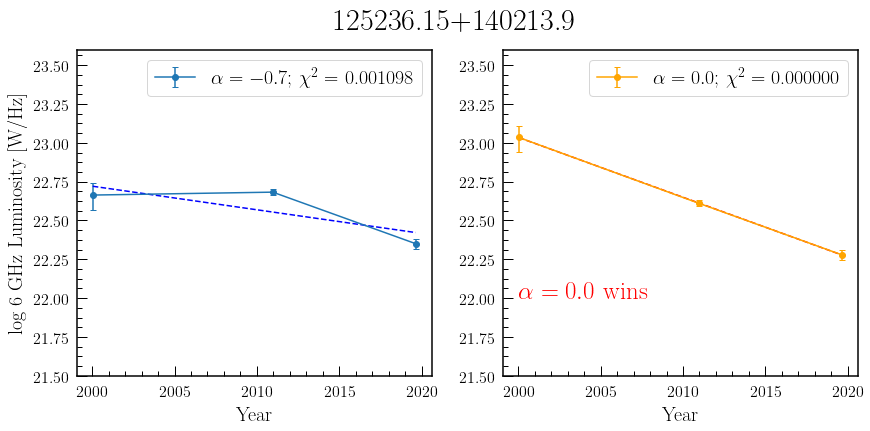

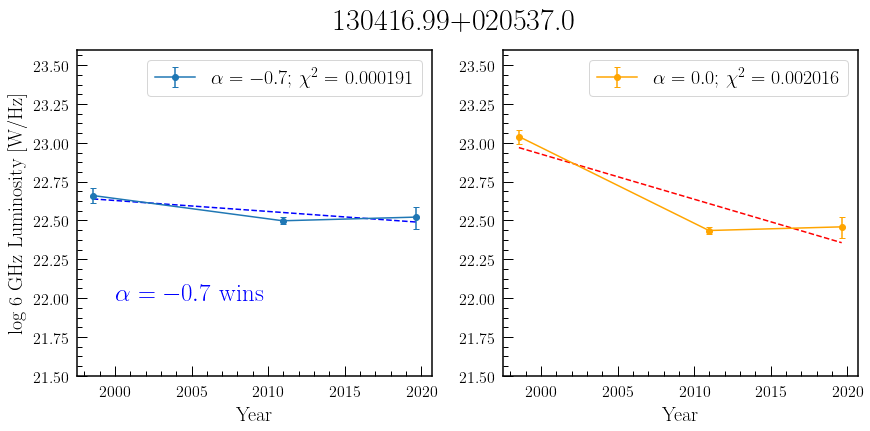

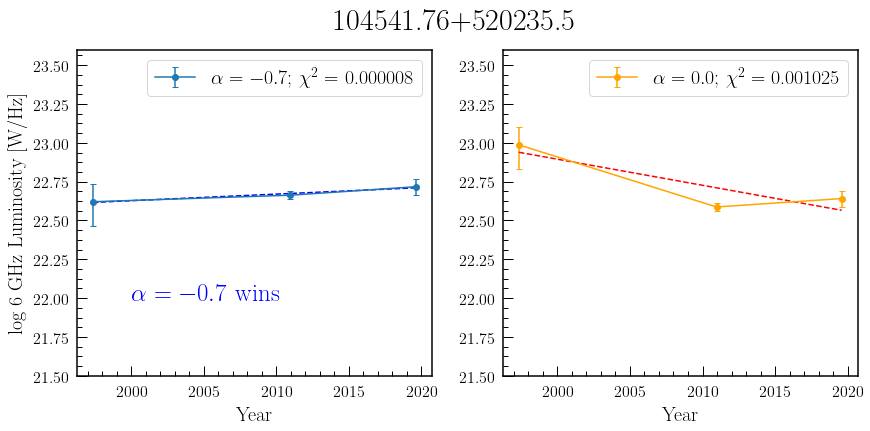

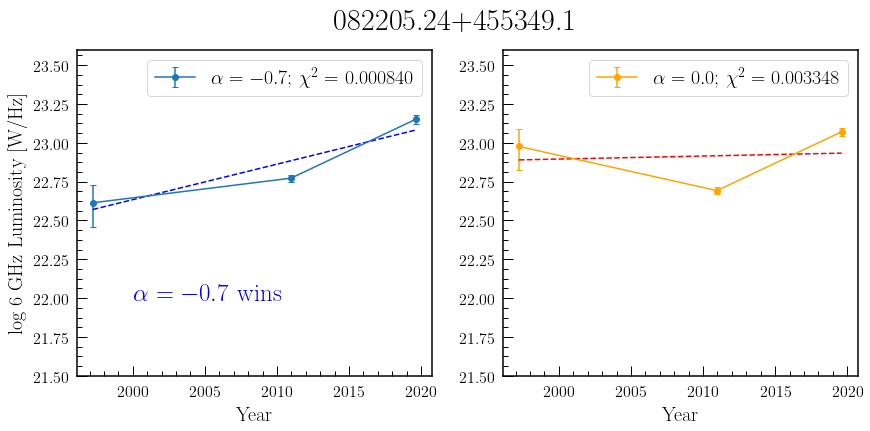

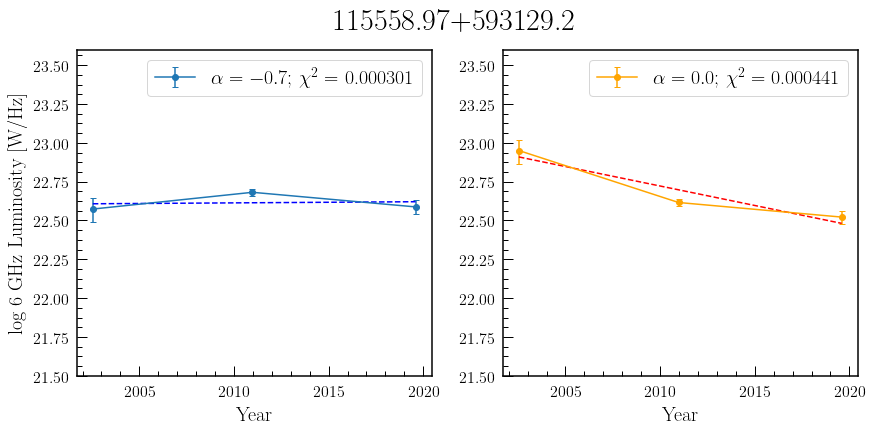

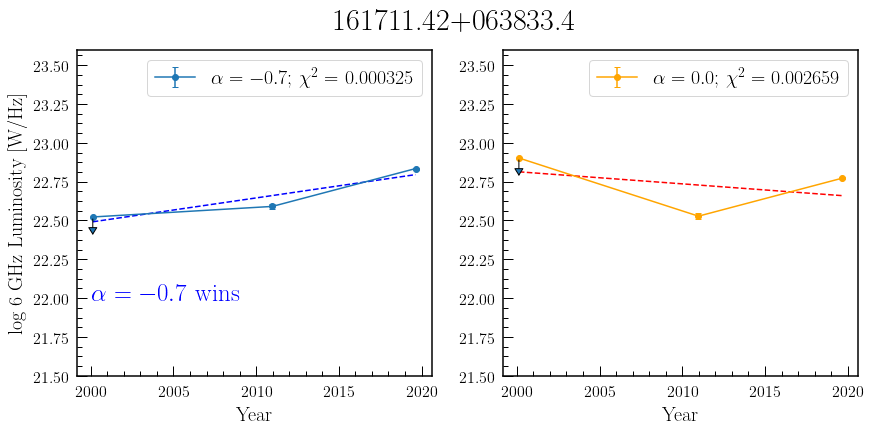

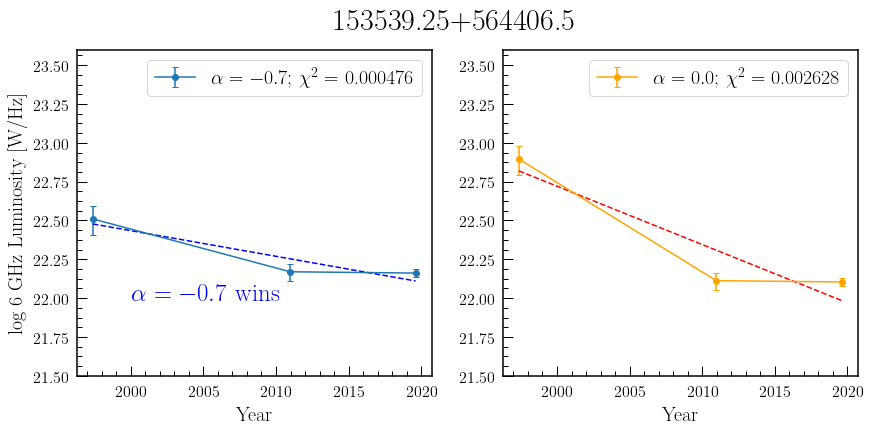

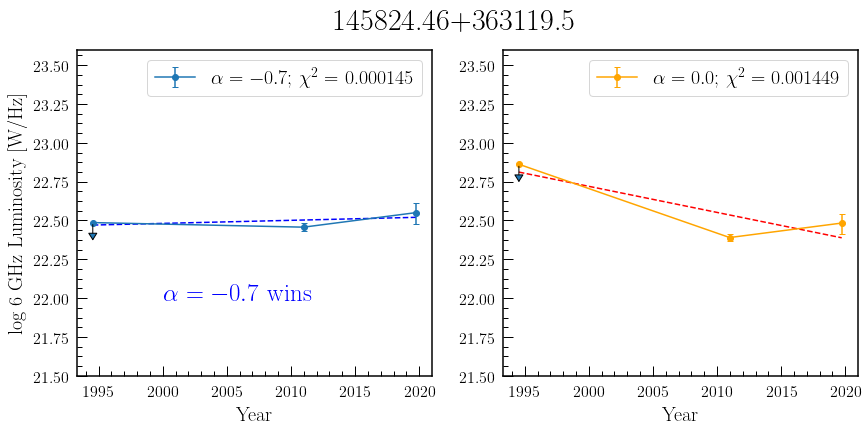

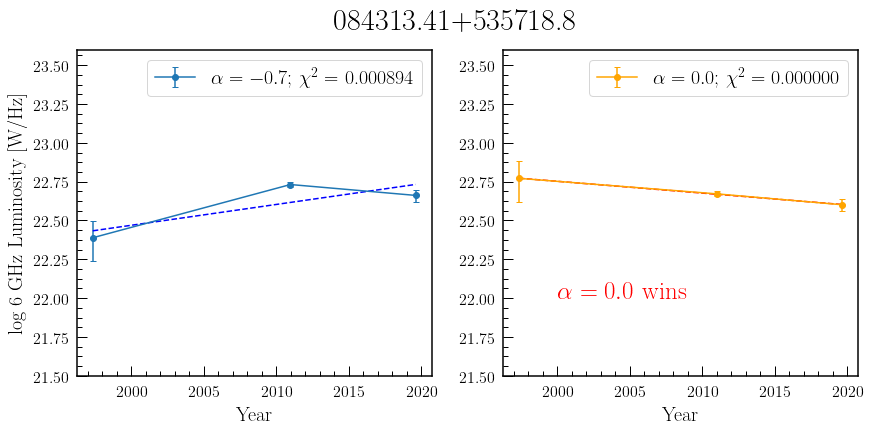

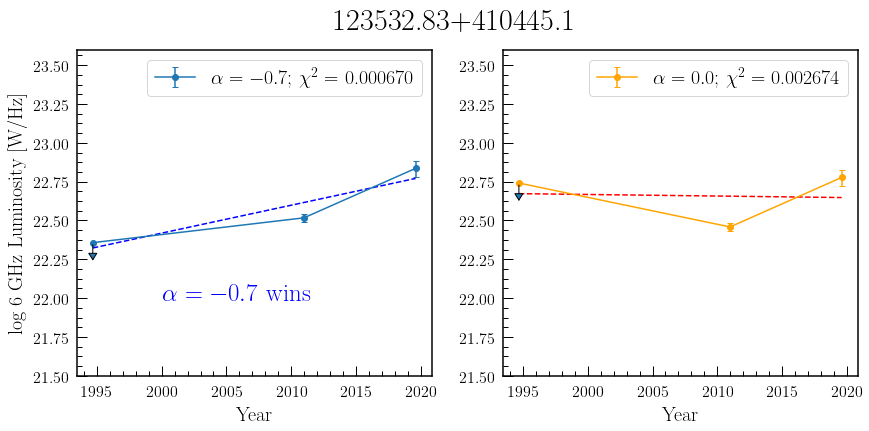

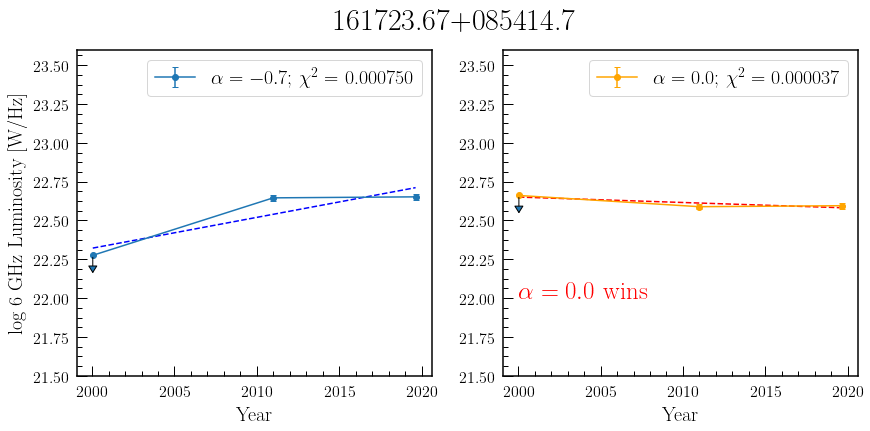

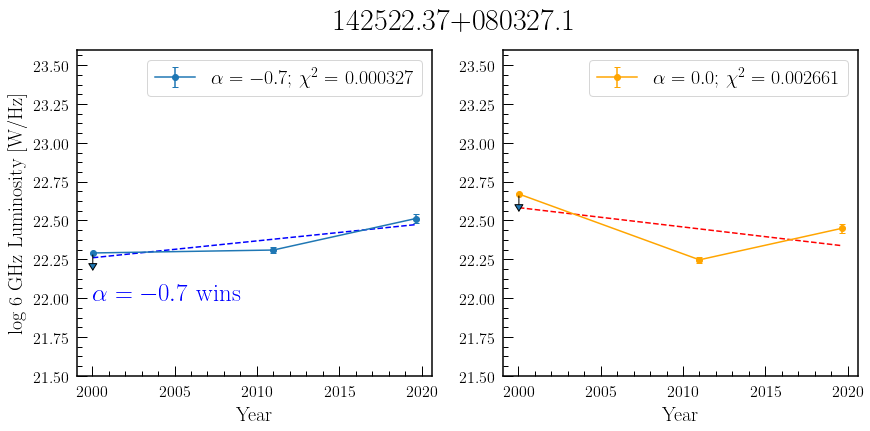

Radio-quiet spectral index counts:

alpha=0.0 : 8
alpha=-0.7: 20


In [15]:
#Can save the recorded spectral indinces here
alpha_rq = np.zeros(len(data[RQ]))

num0 = 0
num7 = 0

for i in range(len(data[RQ])):
    #do linear fit on both alpha=0.0 and -0.7 data
    fit_alpha0 = np.polyfit(dates_fit[RQ][i][novlass], dataup[RQ][i][novlass],1) 
    fit_alphaminp7 = np.polyfit(dates_fit[RQ][i][novlass], data[RQ][i][novlass],1)
    
    #write out linear equations for those fits
    y0 = fit_alpha0[0]*dates_fit[RQ][i][novlass] + fit_alpha0[1]
    y7 = fit_alphaminp7[0]*dates_fit[RQ][i][novlass] + fit_alphaminp7[1]
    
    #do chi squared test to check which data follow the linear model better
    chisq_alpha0 = spstats.chisquare(dataup[RQ][i][novlass], y0)
    chisq_alphaminp7 = spstats.chisquare(data[RQ][i][novlass], y7)
    
    fig, axs = plt.subplots(1, 2, figsize=(14,6))
    if chisq_alphaminp7 < chisq_alpha0:
        num7+=1
        axs[0].annotate(s="$\\alpha=-0.7$ wins", xy=(2000,22), color="blue", size=25)
        alpha_rq[i] = -0.7
    else:
        num0+=1
        axs[1].annotate(s="$\\alpha=0.0$ wins", xy=(2000,22), color="red", size=25)
        alpha_rq[i] = 0.0
        
    #plot true luminosities and their fits for each alpha side by side
    axs[0].errorbar(x=dates_fit[RQ][i][novlass], y=data[RQ][i][novlass], yerr=errs_rq[:,i].T, 
                 fmt="-o", capsize=2.8, label="$\\alpha = -0.7$; $\chi^2 =$ {:4f}".format(chisq_alphaminp7[0]))
    axs[0].plot(dates_fit[RQ][i][novlass], y7, '--b')
    
    if (errs_rq[0][i]==0.).all():
        axs[0].annotate('', xy=(dates_fit[RQ][i][0], data[RQ][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        axs[1].annotate('', xy=(dates_fit[RQ][i][0], dataup[RQ][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        
    axs[0].legend(loc="upper right", prop={"size":20})
    axs[0].set_ylim(21.5, 23.6)
    axs[0].set_xlabel("Year", fontsize=20)
    axs[0].set_ylabel("log 6 GHz Luminosity [W/Hz]", fontsize=20)
    axs[1].errorbar(x=dates_fit[RQ][i][novlass], y=dataup[RQ][i][novlass], yerr=errs_rq[:,i].T, 
                 color="orange", fmt="-o", capsize=2.8, label="$\\alpha = 0.0$; $\chi^2 =$ {:4f}".format(chisq_alpha0[0]))
    axs[1].plot(dates_fit[RQ][i][novlass], y0, '--r')
    axs[1].legend(loc="upper right", prop={"size":20})
    axs[1].set_ylim(21.5, 23.6)
    axs[1].set_xlabel("Year", fontsize=20)
    
    plt.suptitle(sdss_names[RQ][i], fontsize=30)
    plt.show()
    
print("Radio-quiet spectral index counts:\n")
print("alpha=0.0 : %d" % num0)
print("alpha=-0.7: %d" % num7)
alpha[RQ] = alpha_rq

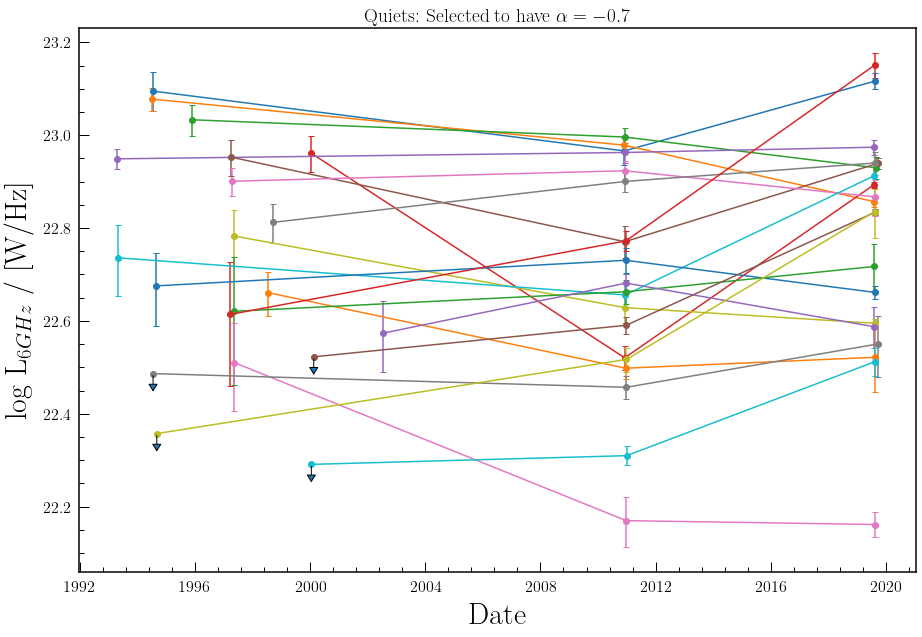

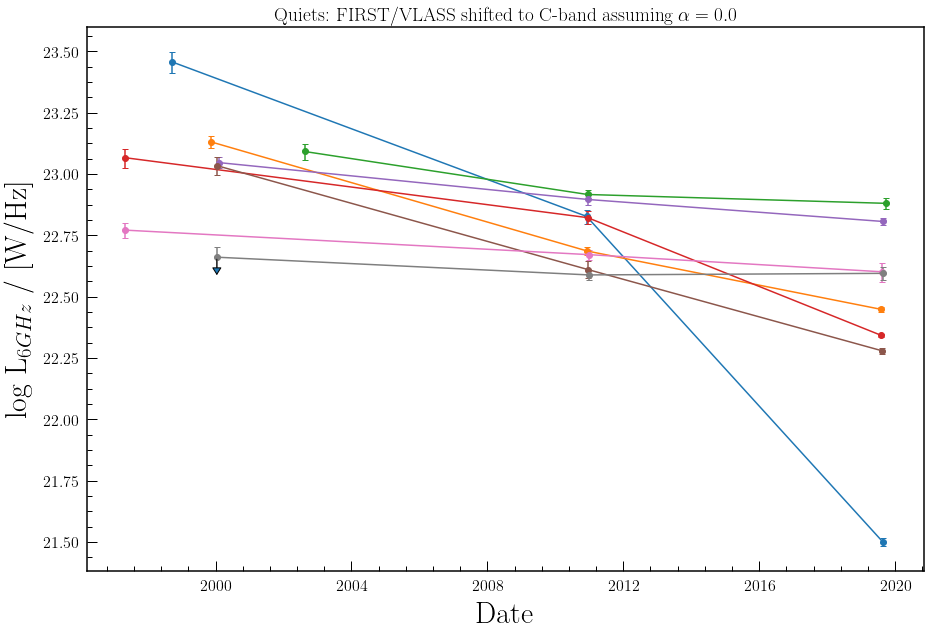

In [16]:
fig = plt.figure(figsize=(15,10))

for i in range(data[RQ][alpha[RQ]==-0.7].shape[0]):
    plt.errorbar(x=dates[RQ][alpha[RQ]==-0.7][i][novlass], y=data[RQ][alpha[RQ]==-0.7][i][novlass], 
                 yerr=np.array([errs_rq[0][alpha_rq==-0.7][i], errs_rq[1][alpha_rq==-0.7][i], errs_rq[2][alpha_rq==-0.7][i]]).T, 
                 fmt="-o", capsize=2.8)
    
    #Check if FIRST is a non-detection
    if (errs_rq[0][alpha_rq==-0.7][i]==0.).all():
        plt.annotate('', xy=(dates[RQ][alpha[RQ]==-0.7][i][0], data[RQ][alpha[RQ]==-0.7][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
     

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Quiets: Selected to have $\\alpha=-0.7$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()



fig = plt.figure(figsize=(15,10))

for i in range(dataup[RQ][alpha[RQ]==0.0].shape[0]):
    plt.errorbar(x=dates[RQ][alpha[RQ]==0.0][i][novlass], y=dataup[RQ][alpha[RQ]==0.0][i][novlass], 
                 yerr=np.array([errs_rq[0][alpha_rq==-0.7][i], errs_rq[1][alpha_rq==-0.7][i], errs_rq[2][alpha_rq==-0.7][i]]).T, 
                 fmt="-o", capsize=2.8)
    
    #Check if FIRST is a non-detection
    if (errs_rq[0][alpha_rq==0.0][i]==0.).all():
        plt.annotate('', xy=(dates[RQ][alpha[RQ]==0.0][i][0], dataup[RQ][alpha[RQ]==0.0][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Quiets: FIRST/VLASS shifted to C-band assuming $\\alpha=0.0$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()

---
### Intermediates

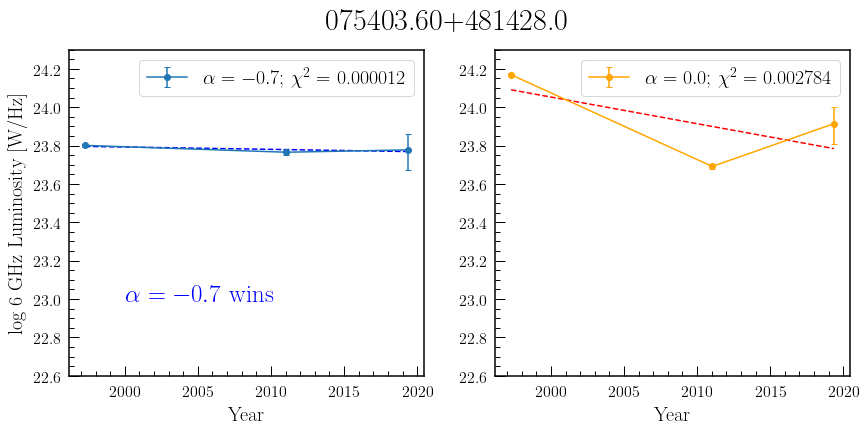

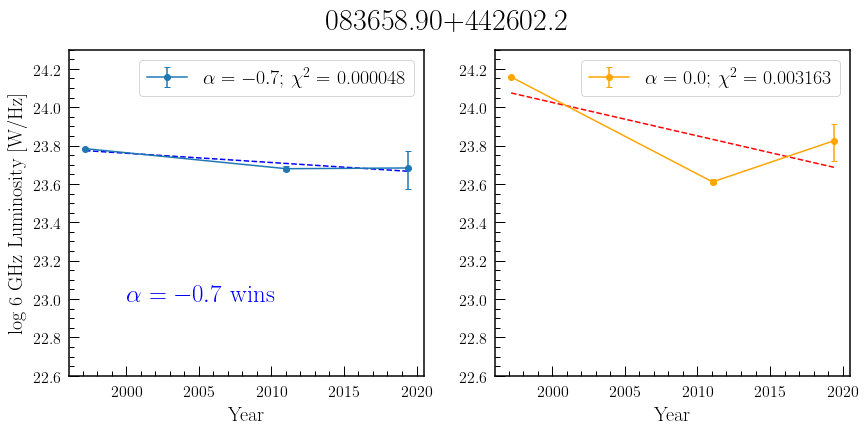

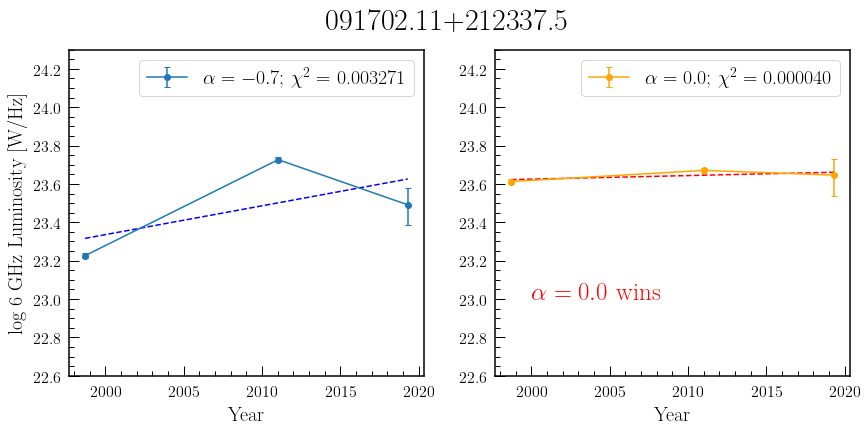

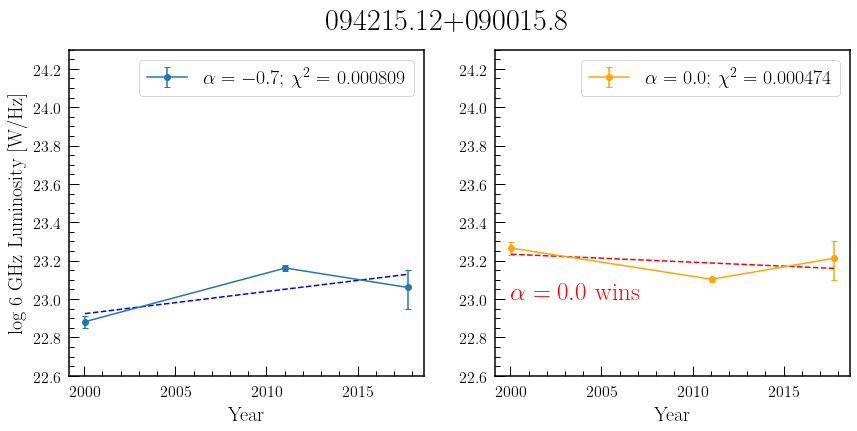

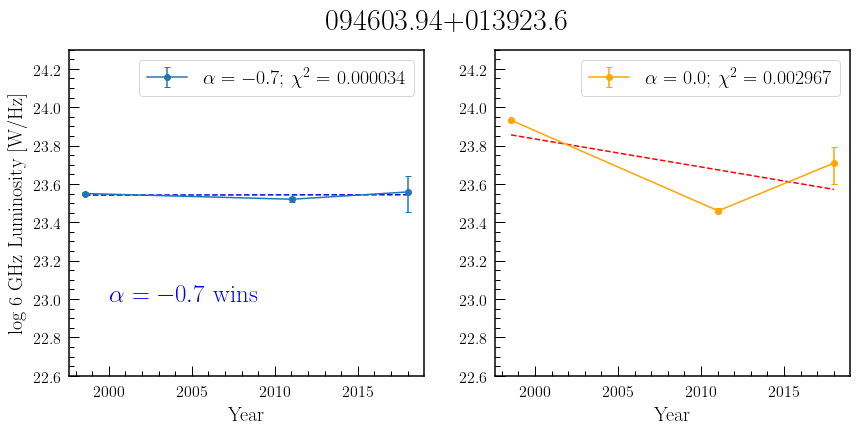

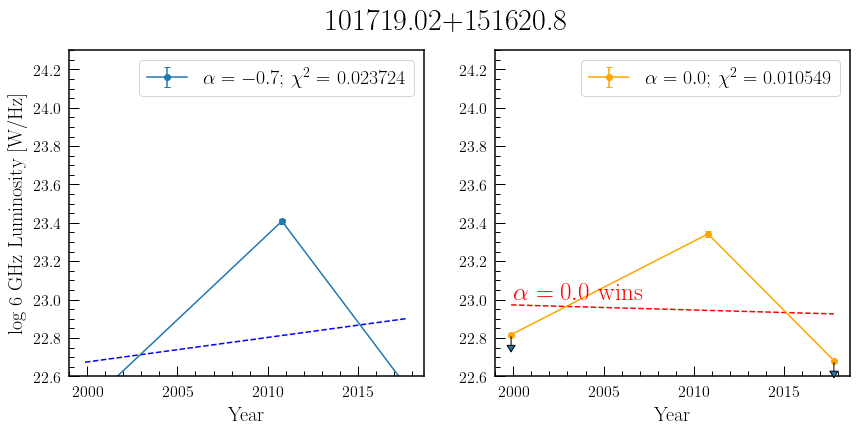

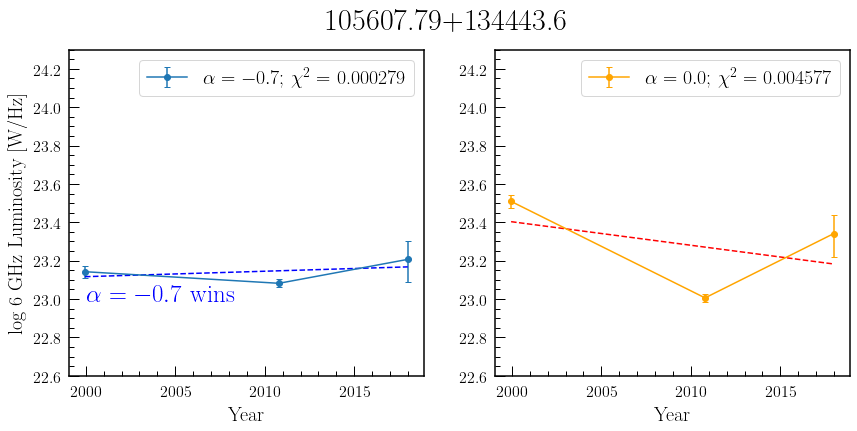

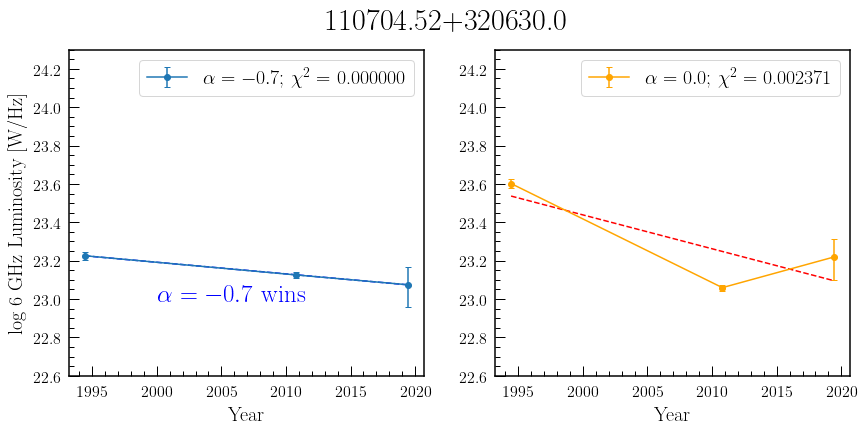

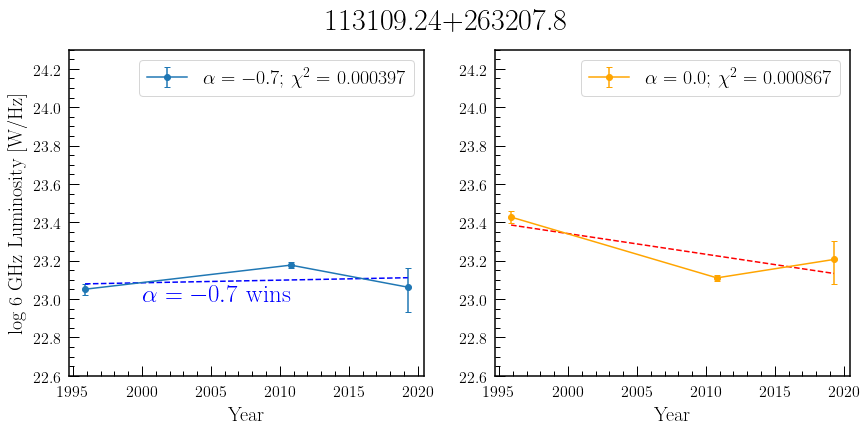

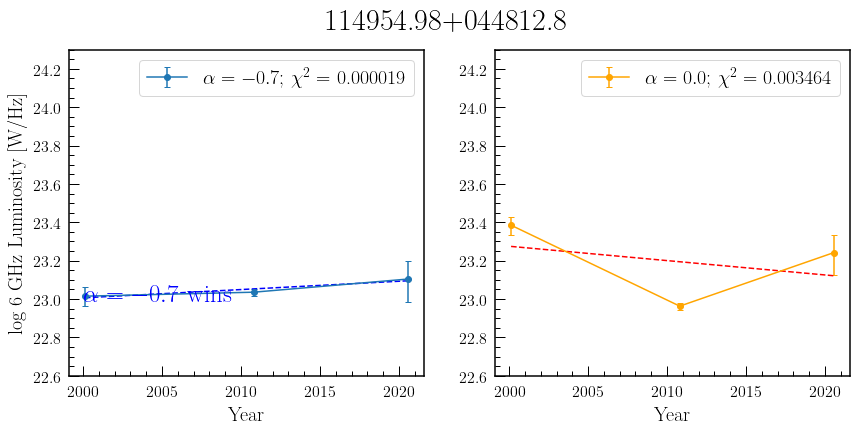

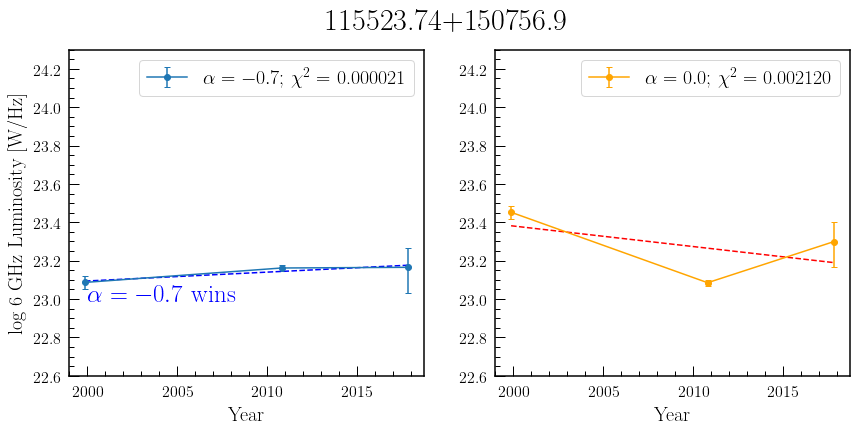

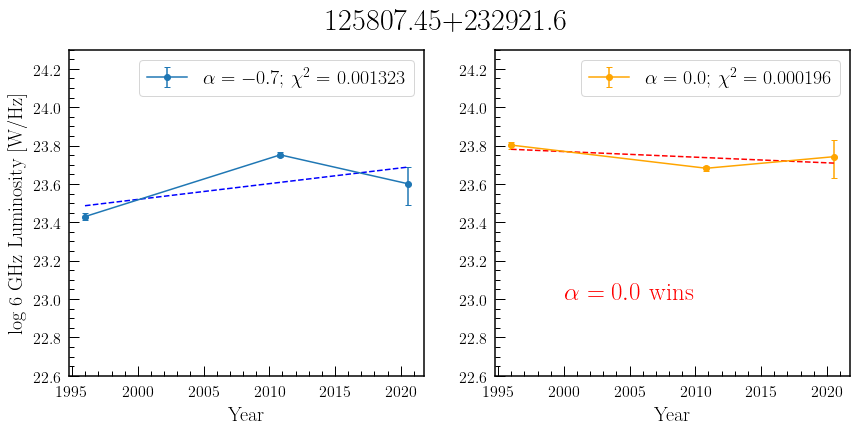

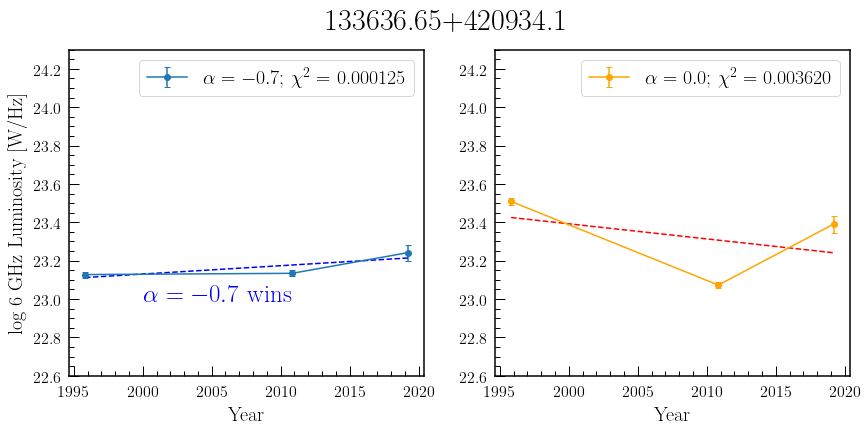

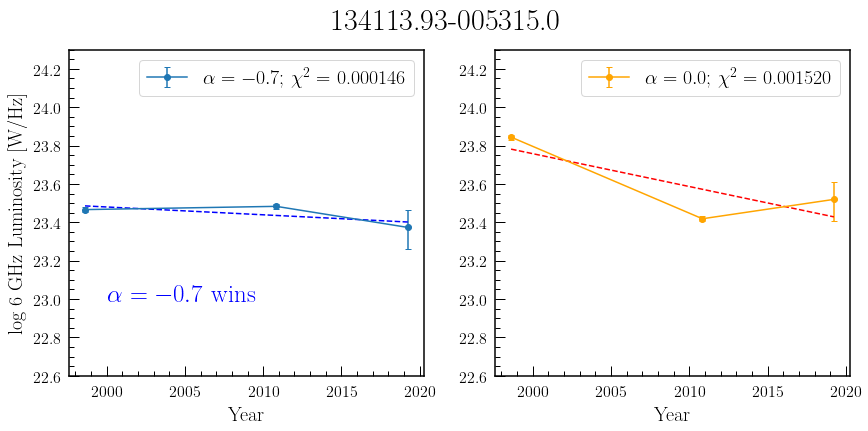

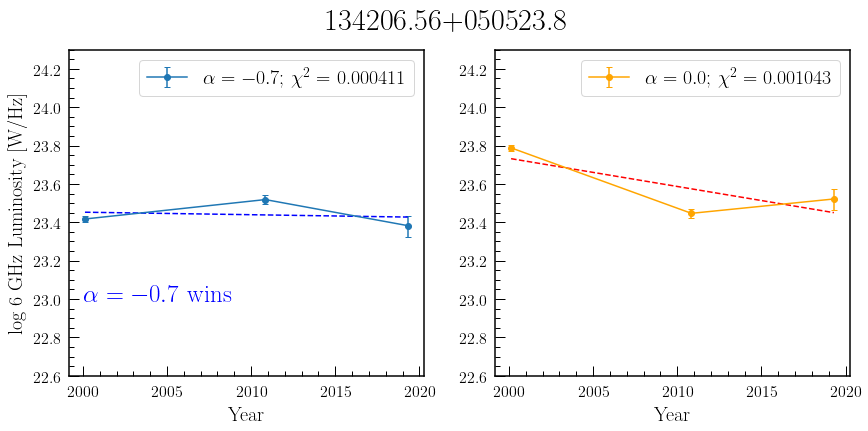

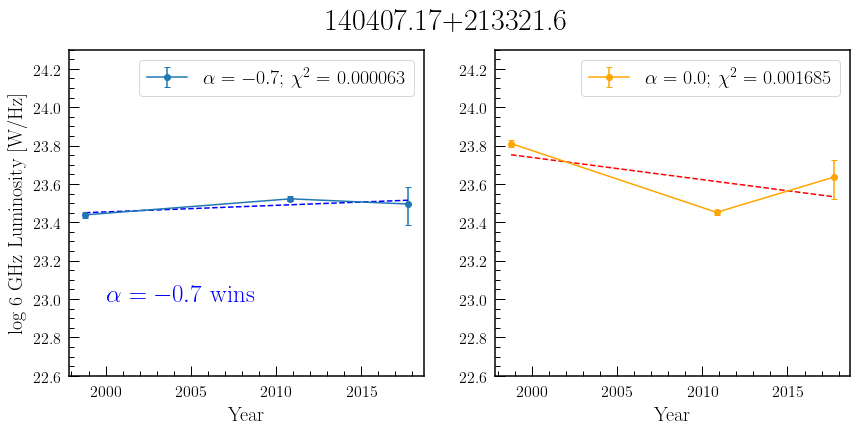

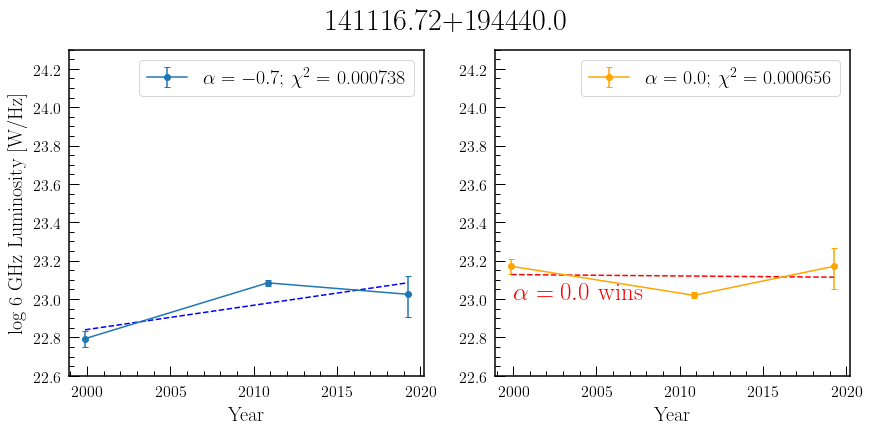

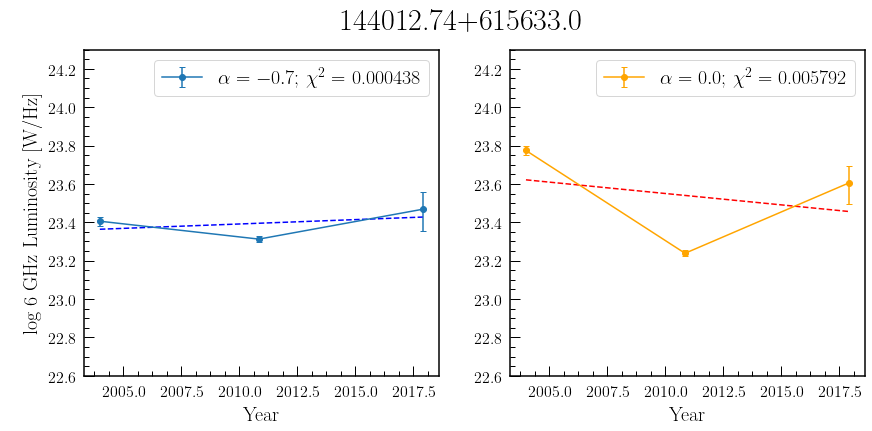

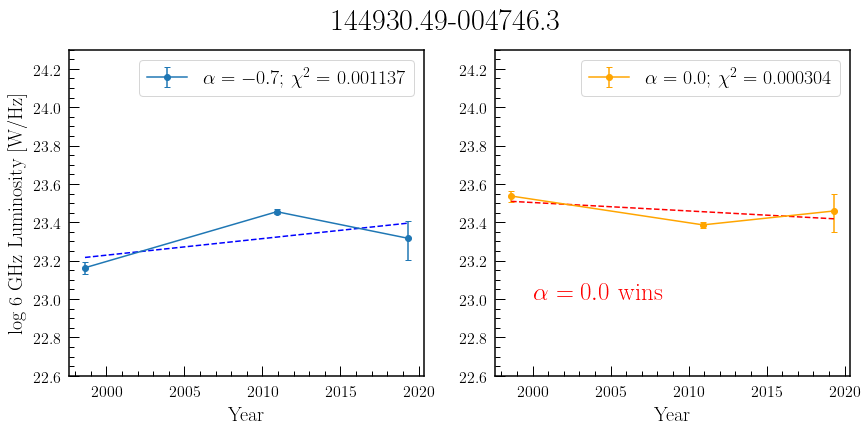

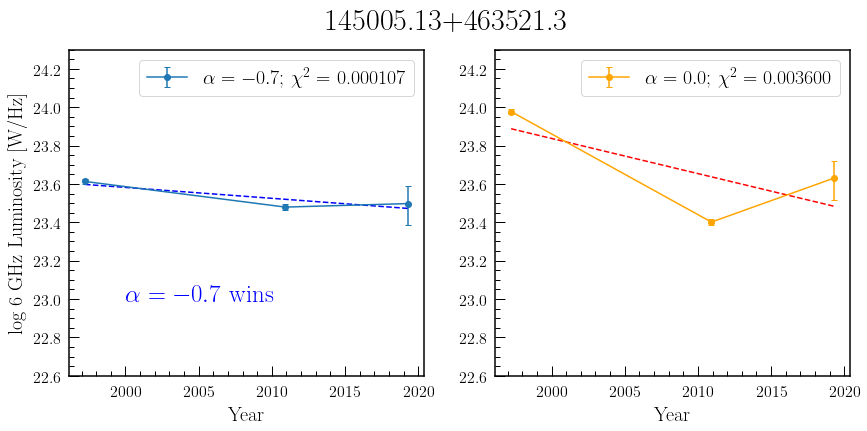

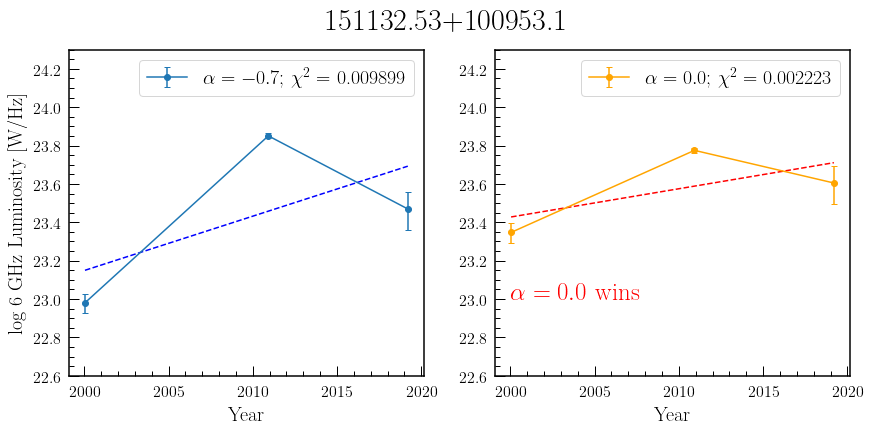

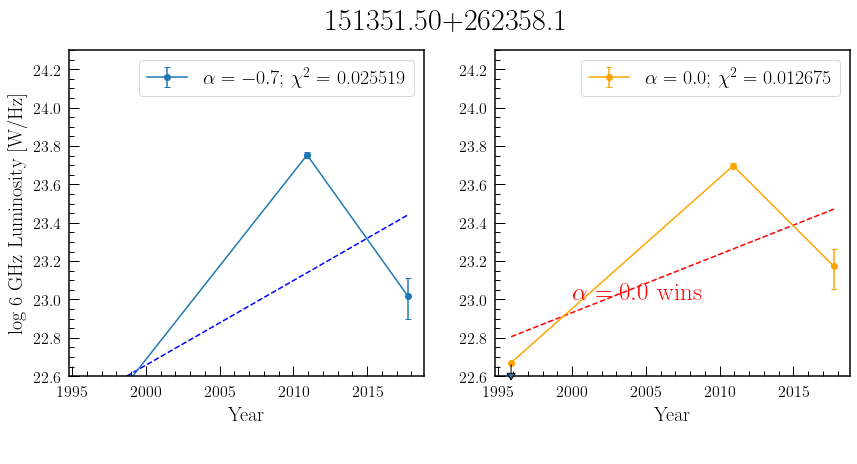

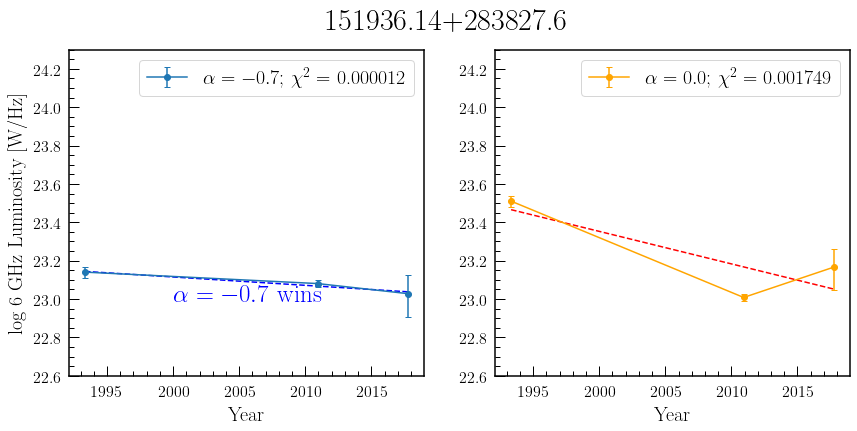

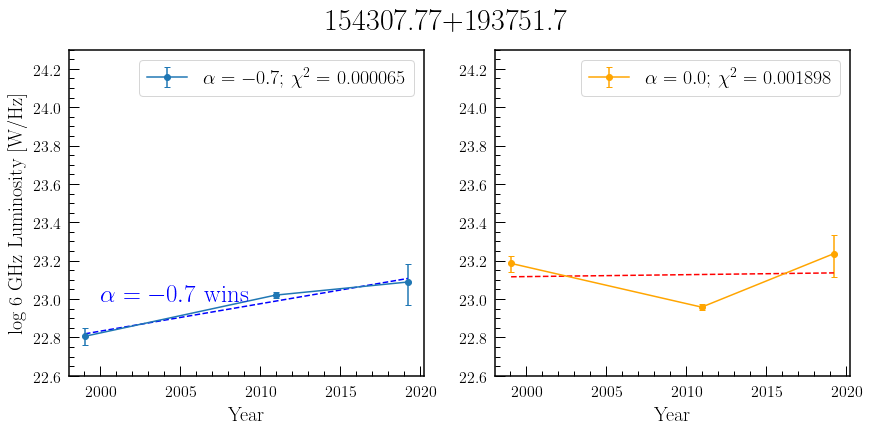

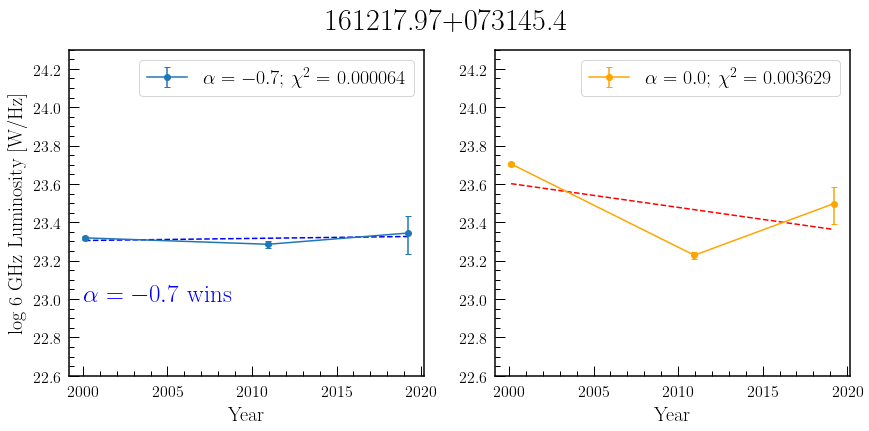

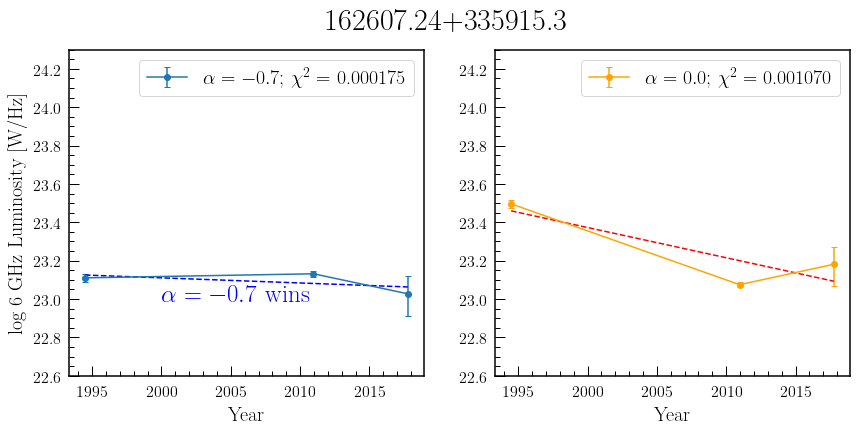

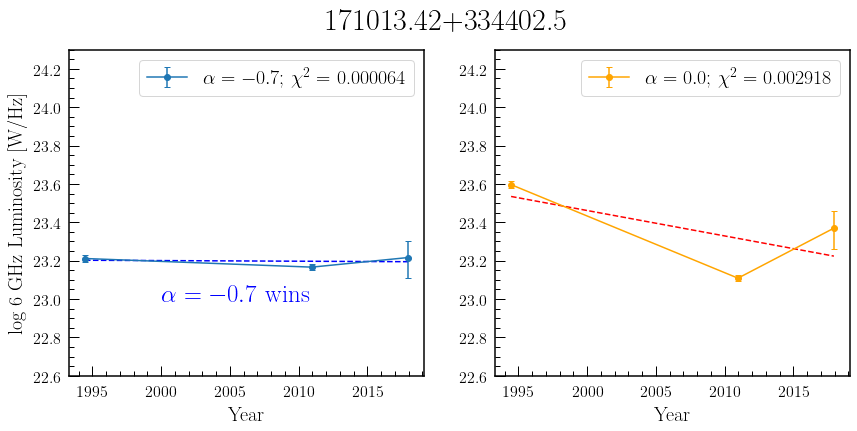

Radio-intermediate spectral index counts:

alpha=0.0 : 8
alpha=-0.7: 19


In [17]:
num0 = 0
num7 = 0

alpha_ri = np.zeros(len(data[RI]))

for i in range(len(data[RI])):
    #do linear fit on both alpha=0.0 and -0.7 data
    fit_alpha0 = np.polyfit(dates_fit[RI][i][:3], dataup[RI][i][:3],1) 
    fit_alphaminp7 = np.polyfit(dates_fit[RI][i][:3], data[RI][i][:3],1)
    
    #write out linear equations for those fits
    y0 = fit_alpha0[0]*dates_fit[RI][i][:3] + fit_alpha0[1]
    y7 = fit_alphaminp7[0]*dates_fit[RI][i][:3] + fit_alphaminp7[1]
    
    #do chi squared test to check which data follow the linear model better
    chisq_alpha0 = spstats.chisquare(dataup[RI][i][:3], y0)
    chisq_alphaminp7 = spstats.chisquare(data[RI][i][:3], y7)
    
    fig, axs = plt.subplots(1, 2, figsize=(14,6))
    if chisq_alphaminp7 < chisq_alpha0:
        num7+=1
        axs[0].annotate(s="$\\alpha=-0.7$ wins", xy=(2000,23), color="blue", size=25)
        alpha_ri[i] = -0.7
    else:
        num0+=1
        axs[1].annotate(s="$\\alpha=0.0$ wins", xy=(2000,23), color="red", size=25)
        alpha_ri[i] = 0.0
        
    #plot true luminosities and their fits for each alpha side by side
    axs[0].errorbar(x=dates_fit[RI][i][:3], y=data[RI][i][:3], yerr=errs_ri[:,i].T, 
                 fmt="-o", capsize=2.8, label="$\\alpha = -0.7$; $\chi^2 =$ {:4f}".format(chisq_alphaminp7[0]))
    axs[0].plot(dates_fit[RI][i][:3], y7, '--b')
    
    if (errs_ri[0][i]==0.).all():
        axs[0].annotate('', xy=(dates_fit[RI][i][0], data[RI][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        axs[1].annotate('', xy=(dates_fit[RI][i][0], dataup[RI][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        
    if (errs_ri[2][i]==0.).all():
        axs[0].annotate('', xy=(dates_fit[RI][i][2], data[RI][i][2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        axs[1].annotate('', xy=(dates_fit[RI][i][2], dataup[RI][i][2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
    
    axs[0].legend(loc="upper right", prop={"size":20})
    axs[0].set_ylim(22.6, 24.3)
    axs[0].set_xlabel("Year", fontsize=20)
    axs[0].set_ylabel("log 6 GHz Luminosity [W/Hz]", fontsize=20)
    axs[1].errorbar(x=dates_fit[RI][i][:3], y=dataup[RI][i][:3], yerr=errs_ri[:,i].T, 
                 color="orange", fmt="-o", capsize=2.8, label="$\\alpha = 0.0$; $\chi^2 =$ {:4f}".format(chisq_alpha0[0]))
    axs[1].plot(dates_fit[RI][i][:3], y0, '--r')
    axs[1].legend(loc="upper right", prop={"size":20})
    axs[1].set_ylim(22.6, 24.3)
    axs[1].set_xlabel("Year", fontsize=20)
    
    plt.suptitle(sdss_names[RI][i], fontsize=30)
    plt.show()
    
print("Radio-intermediate spectral index counts:\n")
print("alpha=0.0 : %d" % num0)
print("alpha=-0.7: %d" % num7)
alpha[RI] = alpha_ri

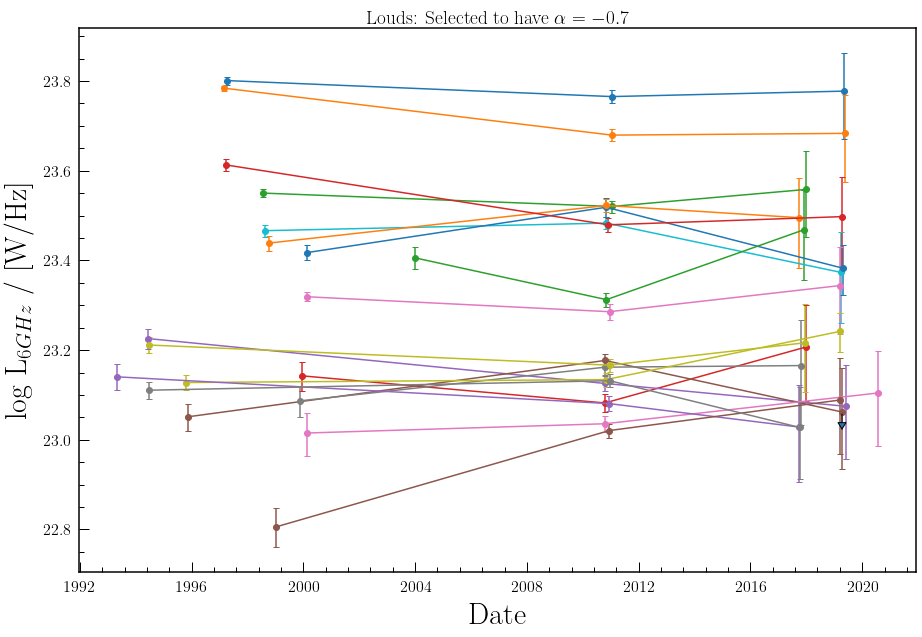

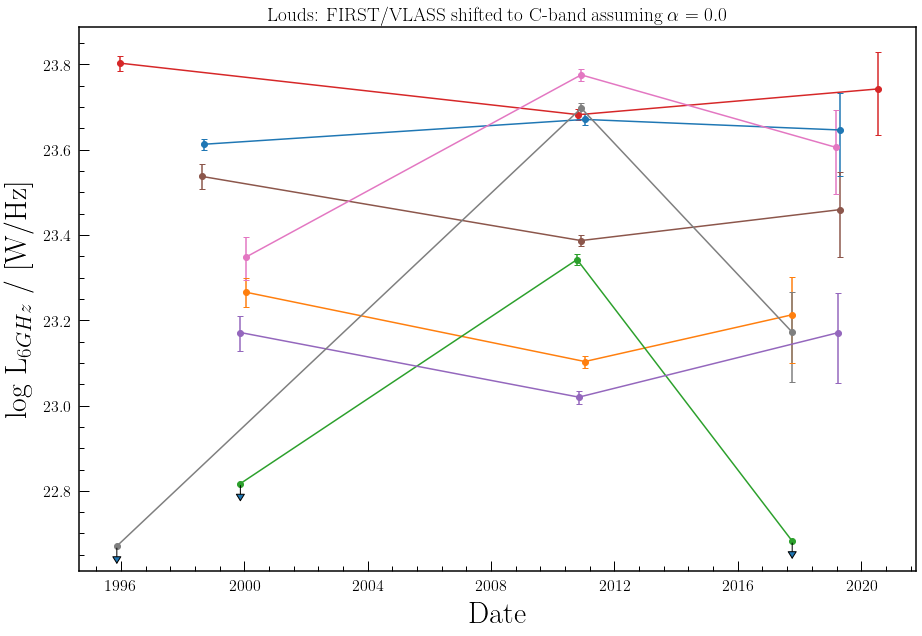

In [18]:
fig = plt.figure(figsize=(15,10))

for i in range(data[RI][alpha[RI]==-0.7].shape[0]):
    plt.errorbar(x=dates[RI][alpha[RI]==-0.7][i][:3], y=data[RI][alpha[RI]==-0.7][i][:3], 
                 yerr=np.array([errs_ri[0][alpha_ri==-0.7][i], errs_ri[1][alpha_ri==-0.7][i], errs_ri[2][alpha_ri==-0.7][i]]).T, 
                 fmt="-o", capsize=2.8)
    
    #Check if FIRST non-detection
    if (errs_ri[0][alpha[RI]==-0.7][i]==0.).all():
        plt.annotate('', xy=(dates[RI][alpha[RI]==-0.7][i][0], data[RI][alpha[RI]==-0.7][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        
    #Check if VLASS non-detection
    if (errs_ri[2][i]==0.).all():
        plt.annotate('', xy=(dates[RI][alpha[RI]==-0.7][i][2], data[RI][alpha[RI]==-0.7][i][2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Louds: Selected to have $\\alpha=-0.7$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()



fig = plt.figure(figsize=(15,10))

for i in range(dataup[RI][alpha[RI]==0.0].shape[0]):
    plt.errorbar(x=dates[RI][alpha[RI]==0.0][i][:3], y=dataup[RI][alpha[RI]==0.0][i][:3], 
                 yerr=np.array([errs_ri[0][alpha_ri==0.0][i], errs_ri[1][alpha_ri==0.0][i], errs_ri[2][alpha_ri==0.0][i]]).T, 
                 fmt="-o", capsize=2.8)
    
    #Check if FIRST non-detection
    if (errs_ri[0][alpha[RI]==0.0][i]==0.).all():
        plt.annotate('', xy=(dates[RI][alpha[RI]==0.0][i][0], dataup[RI][alpha[RI]==0.0][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        
    #Check if VLASS non-detection
    if (errs_ri[2][alpha[RI]==0.0][i]==0.).all():
        plt.annotate('', xy=(dates[RI][alpha[RI]==0.0][i][2], dataup[RI][alpha[RI]==0.0][i][2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Louds: FIRST/VLASS shifted to C-band assuming $\\alpha=0.0$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()

---

### Louds

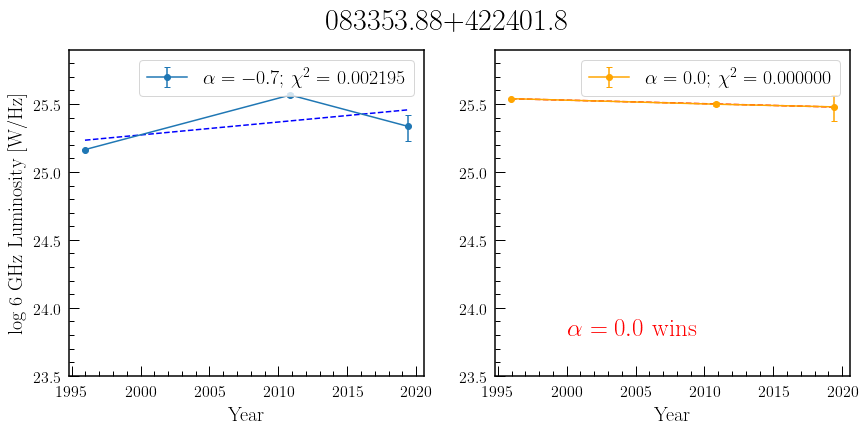

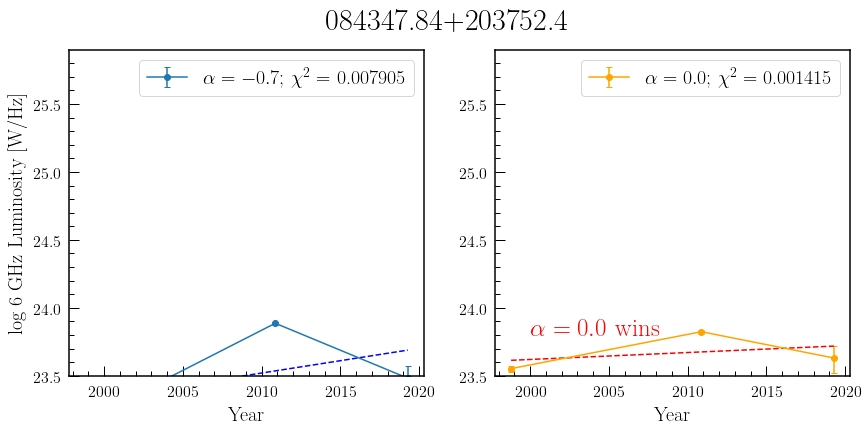

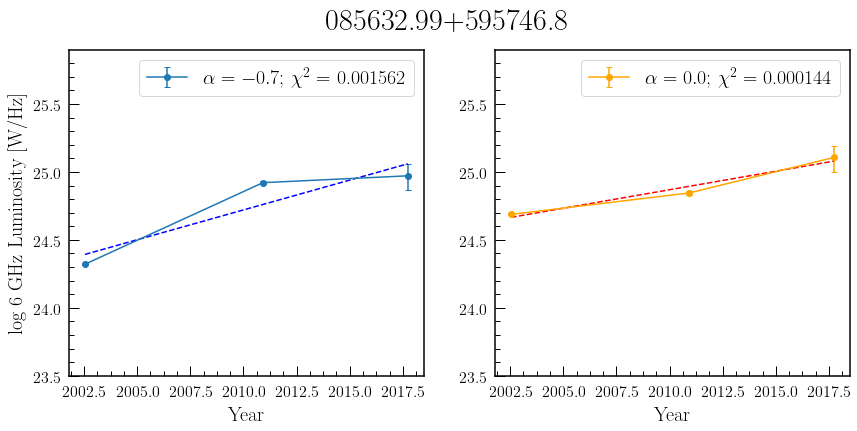

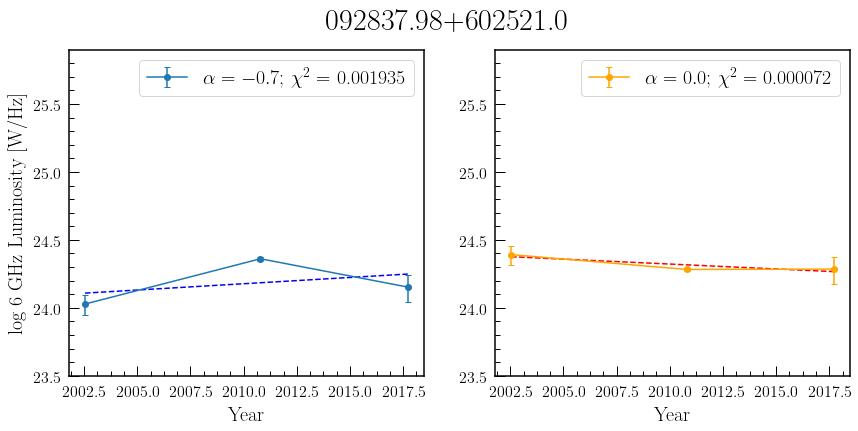

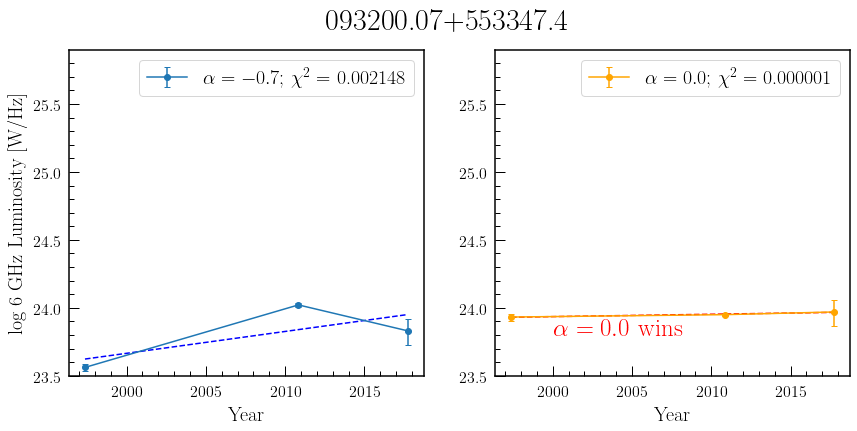

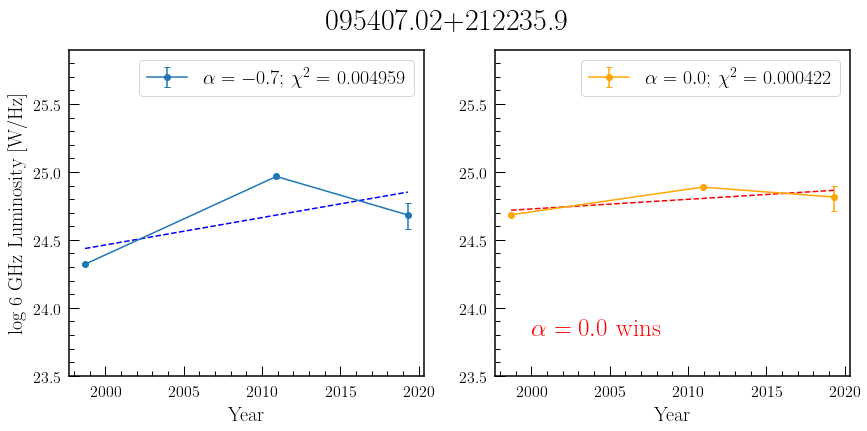

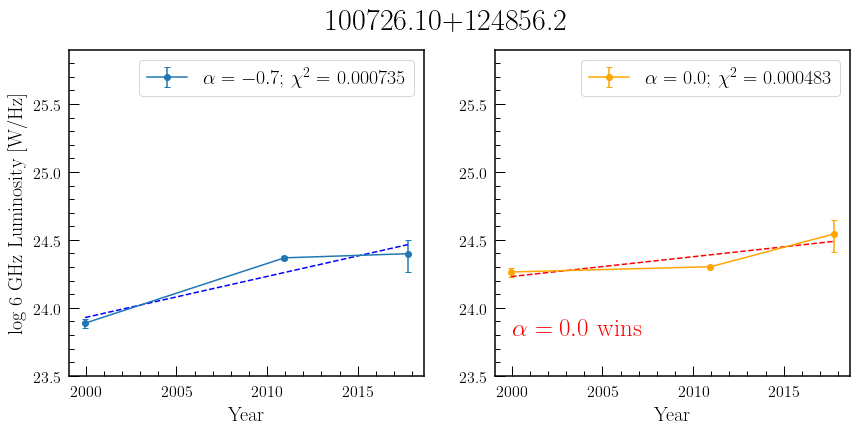

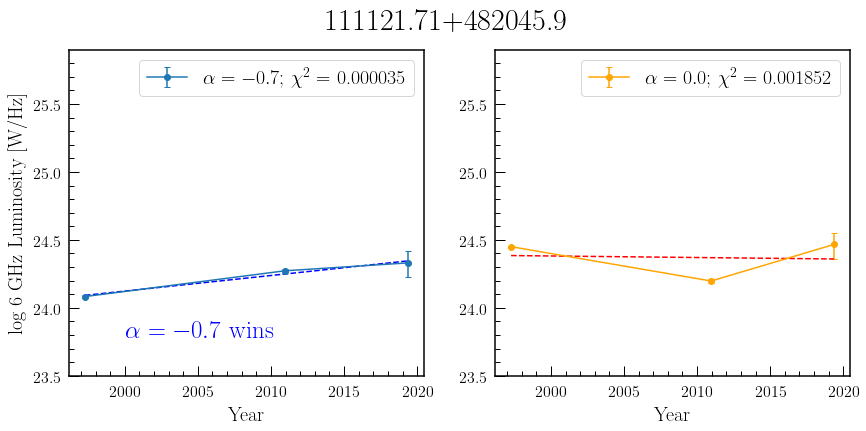

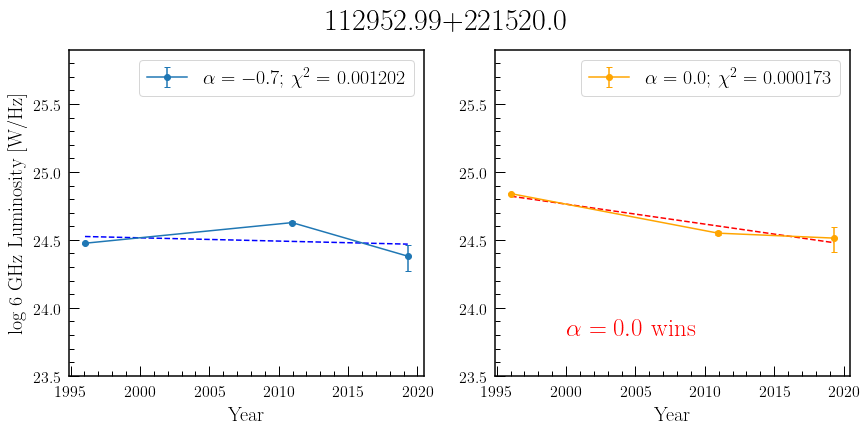

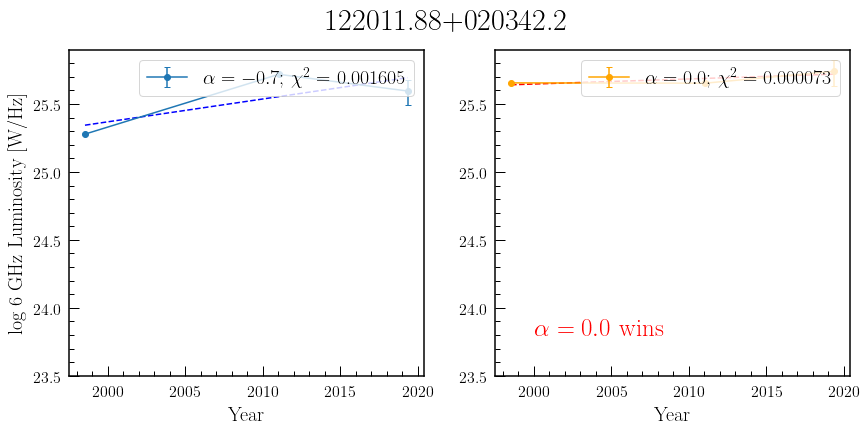

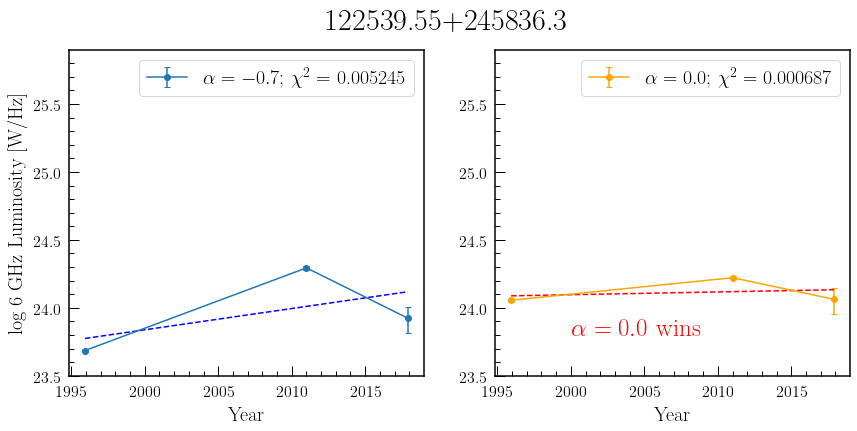

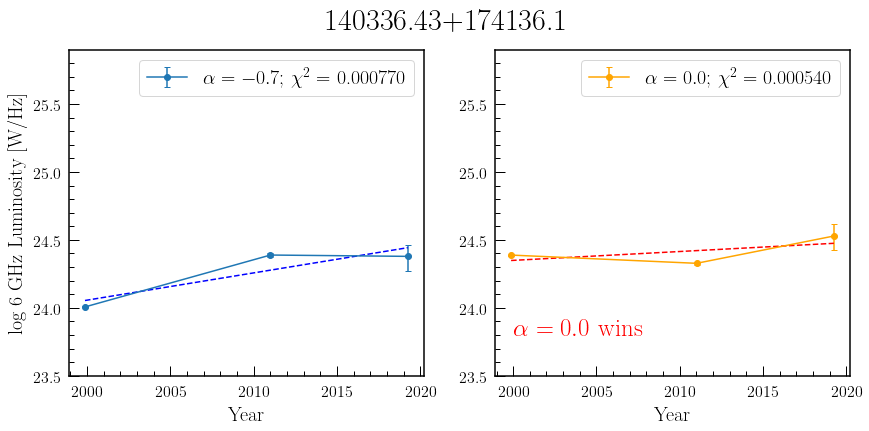

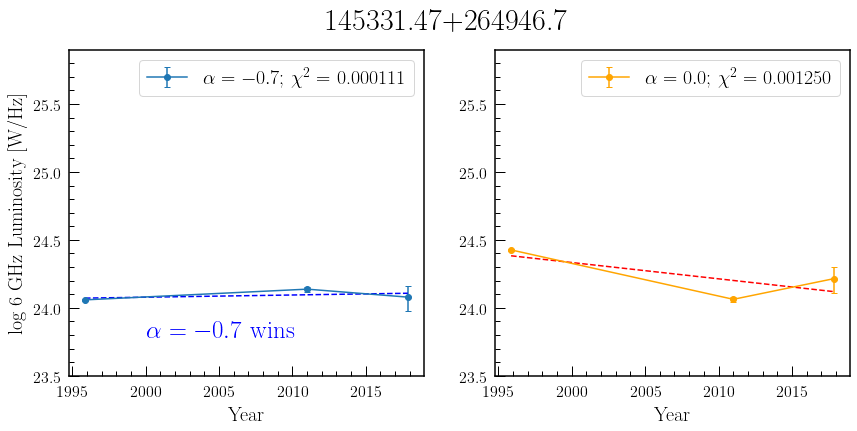

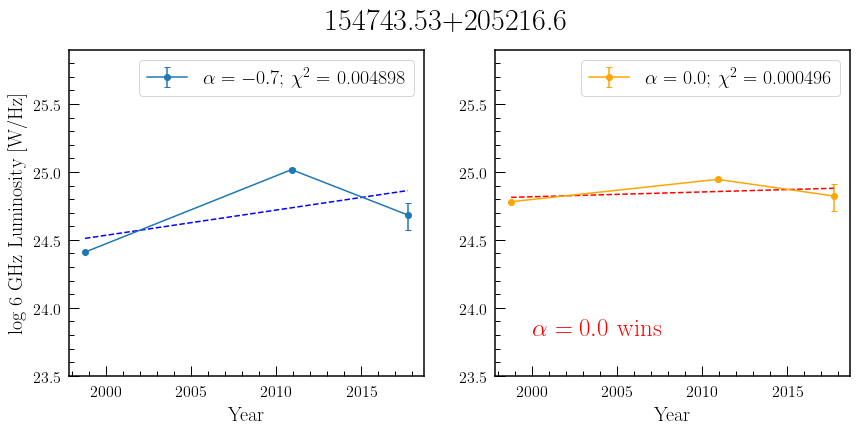

Radio-loud spectral index counts:

alpha=0.0 : 12
alpha=-0.7: 2


In [19]:
num0 = 0
num7 = 0

alpha_rl = np.zeros(len(data[RL]))

for i in range(len(data[RL])):
    #do linear fit on both alpha=0.0 and -0.7 data
    fit_alpha0 = np.polyfit(dates_fit[RL][i][:3], dataup[RL][i][:3],1) 
    fit_alphaminp7 = np.polyfit(dates_fit[RL][i][:3], data[RL][i][:3],1)
    
    #write out linear equations for those fits
    y0 = fit_alpha0[0]*dates_fit[RL][i][:3] + fit_alpha0[1]
    y7 = fit_alphaminp7[0]*dates_fit[RL][i][:3] + fit_alphaminp7[1]
    
    #do chi squared test to check which data follow the linear model better
    chisq_alpha0 = spstats.chisquare(dataup[RL][i][:3], y0)
    chisq_alphaminp7 = spstats.chisquare(data[RL][i][:3], y7)
    
    fig, axs = plt.subplots(1, 2, figsize=(14,6))
    if chisq_alphaminp7 < chisq_alpha0:
        num7+=1
        axs[0].annotate(s="$\\alpha=-0.7$ wins", xy=(2000,23.8), color="blue", size=25)
        alpha_rl[i] = -0.7
    else:
        num0+=1
        axs[1].annotate(s="$\\alpha=0.0$ wins", xy=(2000,23.8), color="red", size=25)
        alpha_rl[i] = 0.0
        
    #plot true luminosities and their fits for each alpha side by side
    axs[0].errorbar(x=dates_fit[RL][i][:3], y=data[RL][i][:3], yerr=errs_rl[:,i].T, 
                 fmt="-o", capsize=2.8, label="$\\alpha = -0.7$; $\chi^2 =$ {:4f}".format(chisq_alphaminp7[0]))
    axs[0].plot(dates_fit[RL][i][:3], y7, '--b')
    axs[0].legend(loc="upper right", prop={"size":20})
    axs[0].set_ylim(23.5, 25.9)
    axs[0].set_xlabel("Year", fontsize=20)
    axs[0].set_ylabel("log 6 GHz Luminosity [W/Hz]", fontsize=20)
    axs[1].errorbar(x=dates_fit[RL][i][:3], y=dataup[RL][i][:3], yerr=errs_rl[:,i].T, 
                 color="orange", fmt="-o", capsize=2.8, label="$\\alpha = 0.0$; $\chi^2 =$ {:4f}".format(chisq_alpha0[0]))
    axs[1].plot(dates_fit[RL][i][:3], y0, '--r')
    axs[1].legend(loc="upper right", prop={"size":20})
    axs[1].set_ylim(23.5, 25.9)
    axs[1].set_xlabel("Year", fontsize=20)
    
    plt.suptitle(sdss_names[RL][i], fontsize=30)
    plt.show()
    
print("Radio-loud spectral index counts:\n")
print("alpha=0.0 : %d" % num0)
print("alpha=-0.7: %d" % num7)
alpha[RL] = alpha_rl

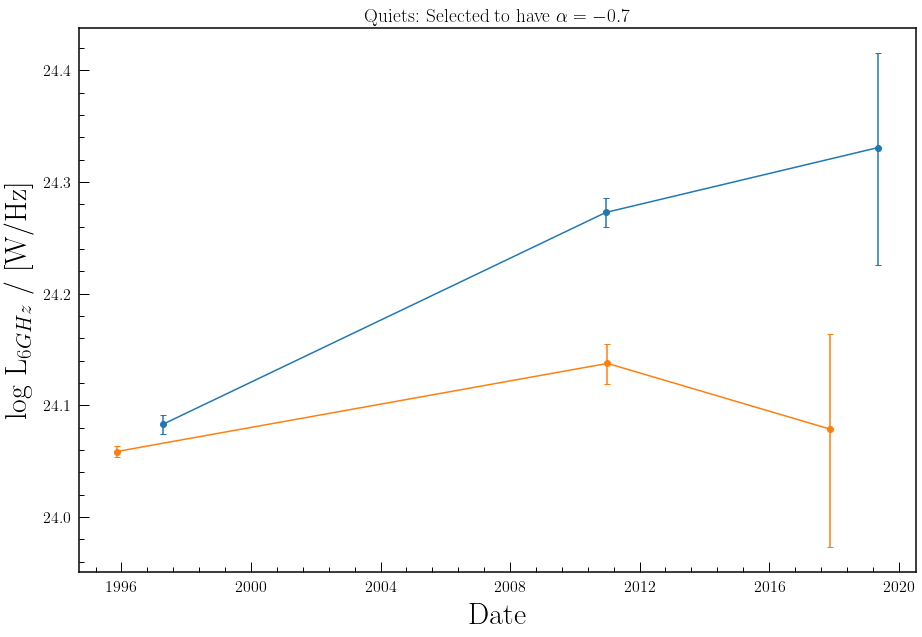

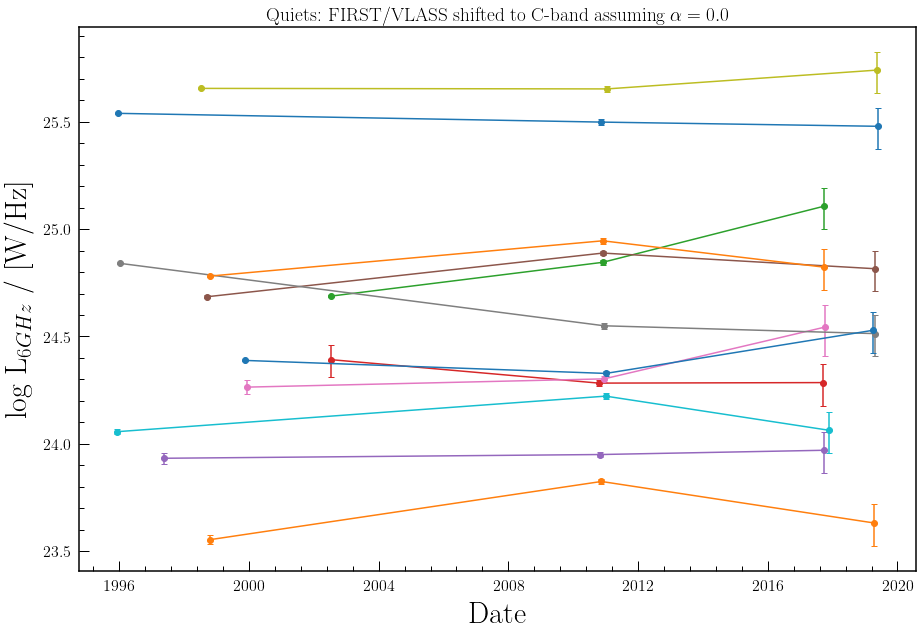

In [20]:
fig = plt.figure(figsize=(15,10))

for i in range(data[RL][alpha[RL]==-0.7].shape[0]):
    plt.errorbar(x=dates[RL][alpha[RL]==-0.7][i][:3], y=data[RL][alpha[RL]==-0.7][i][:3], 
                 yerr=np.array([errs_rl[0][alpha_rl==-0.7][i], errs_rl[1][alpha_rl==-0.7][i], errs_rl[2][alpha_rl==-0.7][i]]).T, 
                 fmt="-o", capsize=2.8)

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Quiets: Selected to have $\\alpha=-0.7$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()



fig = plt.figure(figsize=(15,10))

for i in range(dataup[RL][alpha[RL]==0.0].shape[0]):
    plt.errorbar(x=dates[RL][alpha[RL]==0.0][i][:3], y=dataup[RL][alpha[RL]==0.0][i][:3], 
                 yerr=np.array([errs_rl[0][alpha_rl==0.0][i], errs_rl[1][alpha_rl==0.0][i], errs_rl[2][alpha_rl==0.0][i]]).T, 
                 fmt="-o", capsize=2.8)

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Quiets: FIRST/VLASS shifted to C-band assuming $\\alpha=0.0$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()

---

Make summary plot of all light curves showing each choice of spectral index

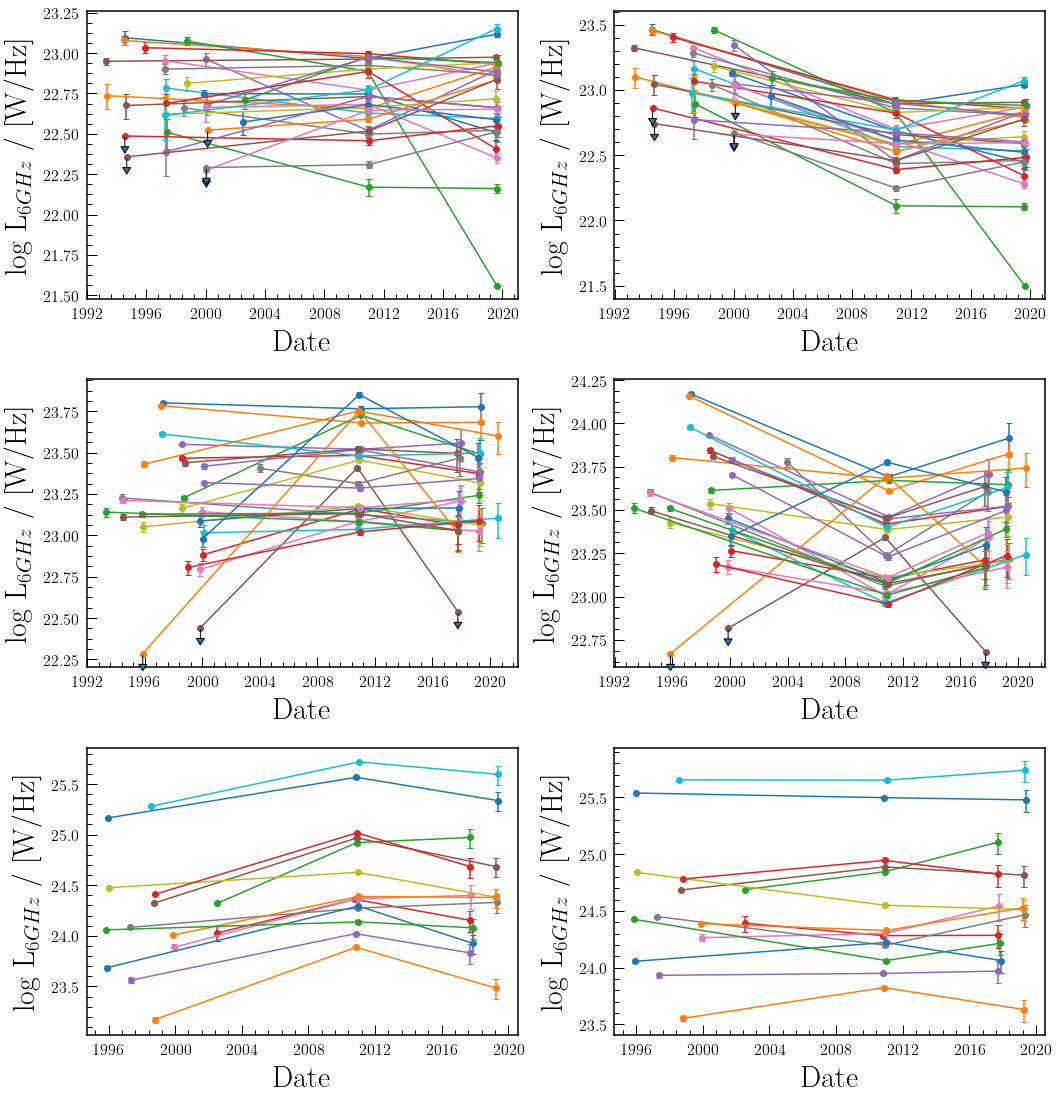

In [21]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15.5))


for i in range(data[RQ].shape[0]):
    axs[0,0].errorbar(x=dates[RQ][i][novlass], y=data[RQ][i][novlass], yerr=errs_rq[:,i].T, 
                 fmt="-o", capsize=2.8)
    
    if (errs_rq[0][i]==0.).all():
        axs[0,0].annotate('', xy=(dates[RQ][i][0], data[RQ][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

axs[0,0].set_xlabel("Date", fontsize=30)
axs[0,0].set_ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)


for i in range(dataup[RQ].shape[0]):
    axs[0,1].errorbar(x=dates[RQ][i][novlass], y=dataup[RQ][i][novlass], yerr=errs_rq[:,i].T, 
                 fmt="-o", capsize=2.8)
    
    if (errs_rq[0][i]==0.).all():
        axs[0,1].annotate('', xy=(dates[RQ][i][0], dataup[RQ][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

axs[0,1].set_xlabel("Date", fontsize=30)
axs[0,1].set_ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)


for i in range(data[RI].shape[0]):
    axs[1,0].errorbar(x=dates[RI][i,:3], y=data[RI][i,:3], yerr=errs_ri[:,i].T, 
                 fmt="-o", capsize=2.8)
    
    #Check if FIRST is a non-detection
    if (errs_ri[0][i]==0.).all():
        axs[1,0].annotate('', xy=(dates[RI][i][0], data[RI][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
     
    #Check if VLASS is a non-detection
    if (errs_ri[2][i]==0.).all():
        axs[1,0].annotate('', xy=(dates[RI][i][2], data[RI][i][2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

axs[1,0].set_xlabel("Date", fontsize=30)
axs[1,0].set_ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)


for i in range(dataup[RI].shape[0]):
    axs[1,1].errorbar(x=dates[RI][i,:3], y=dataup[RI][i,:3], yerr=errs_ri[:,i].T, 
                 fmt="-o", capsize=2.8)
    
    #Check if FIRST is a non-detection
    if (errs_ri[0][i]==0.).all():
        axs[1,1].annotate('', xy=(dates[RI][i][0], dataup[RI][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
     
    #Check if VLASS is a non-detection
    if (errs_ri[2][i]==0.).all():
        axs[1,1].annotate('', xy=(dates[RI][i][2], dataup[RI][i][2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

axs[1,1].set_xlabel("Date", fontsize=30)
axs[1,1].set_ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)


for i in range(data[RL].shape[0]):
    axs[2,0].errorbar(x=dates[RL][i,:3], y=data[RL][i,:3], yerr=errs_rl[:,i].T, 
                 fmt="-o", capsize=2.8)
    
    #Check if FIRST is a non-detection
    if (errs_rl[0][i]==0.).all():
        axs[2,0].annotate('', xy=(dates[RL][i][0], data[RL][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
     
    #Check if VLASS is a non-detection
    if (errs_rl[2][i]==0.).all():
        axs[2,0].annotate('', xy=(dates[RL][i][2], data[RL][i][2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

axs[2,0].set_xlabel("Date", fontsize=30)
axs[2,0].set_ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)



for i in range(dataup[RL].shape[0]):
    axs[2,1].errorbar(x=dates[RL][i,:3], y=dataup[RL][i,:3], yerr=errs_rl[:,i].T, 
                 fmt="-o", capsize=2.8)
    
    #Check if FIRST is a non-detection
    if (errs_rl[0][i]==0.).all():
        axs[2,1].annotate('', xy=(dates[RL][i][0], dataup[RL][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
     
    #Check if VLASS is a non-detection
    if (errs_rl[2][i]==0.).all():
        axs[2,1].annotate('', xy=(dates[RL][i][2], dataup[RL][i][2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

axs[2,1].set_xlabel("Date", fontsize=30)
axs[2,1].set_ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)


plt.tight_layout()
plt.savefig("../PaperPlots/all_light_curves_werrors.pdf")
plt.show()

And another plot showing just the ones we "kept"

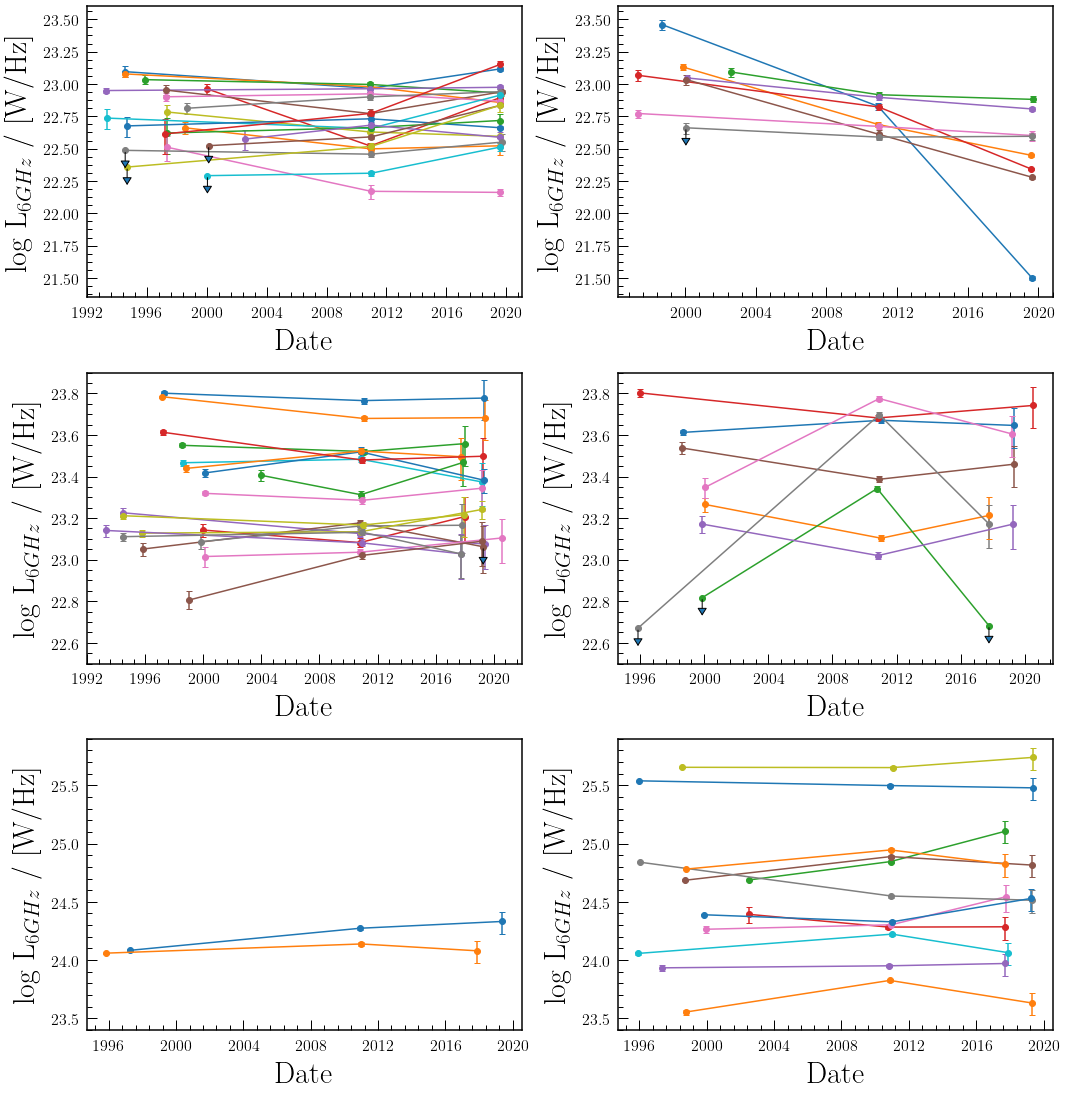

In [22]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15.5))


for i in range(data[RQ][alpha[RQ]==-0.7].shape[0]):
    axs[0,0].errorbar(x=dates[RQ][alpha[RQ]==-0.7][i][novlass], y=data[RQ][alpha[RQ]==-0.7][i][novlass], 
                 yerr=np.array([errs_rq[0][alpha_rq==-0.7][i], errs_rq[1][alpha_rq==-0.7][i], errs_rq[2][alpha_rq==-0.7][i]]).T, 
                 fmt="-o", capsize=2.8)
    
    #Check if FIRST is a non-detection
    if (errs_rq[0][alpha_rq==-0.7][i]==0.).all():
        axs[0,0].annotate('', xy=(dates[RQ][alpha[RQ]==-0.7][i][0], data[RQ][alpha[RQ]==-0.7][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

axs[0,0].set_xlabel("Date", fontsize=30)
axs[0,0].set_ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
axs[0,0].set_ylim(21.35, 23.6)


for i in range(dataup[RQ][alpha[RQ]==0.0].shape[0]):
    axs[0,1].errorbar(x=dates[RQ][alpha[RQ]==0.0][i][novlass], y=dataup[RQ][alpha[RQ]==0.0][i][novlass], 
                 yerr=np.array([errs_rq[0][alpha_rq==-0.7][i], errs_rq[1][alpha_rq==-0.7][i], errs_rq[2][alpha_rq==-0.7][i]]).T, 
                 fmt="-o", capsize=2.8)
    
    #Check if FIRST is a non-detection
    if (errs_rq[0][alpha_rq==0.0][i]==0.).all():
        axs[0,1].annotate('', xy=(dates[RQ][alpha[RQ]==0.0][i][0], dataup[RQ][alpha[RQ]==0.0][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

axs[0,1].set_xlabel("Date", fontsize=30)
axs[0,1].set_ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
axs[0,1].set_ylim(21.35, 23.6)


for i in range(data[RI][alpha[RI]==-0.7].shape[0]):
    axs[1,0].errorbar(x=dates[RI][alpha[RI]==-0.7][i][:3], y=data[RI][alpha[RI]==-0.7][i][:3], 
                 yerr=np.array([errs_ri[0][alpha_ri==-0.7][i], errs_ri[1][alpha_ri==-0.7][i], errs_ri[2][alpha_ri==-0.7][i]]).T, 
                 fmt="-o", capsize=2.8)
    
    #Check if FIRST non-detection
    if (errs_ri[0][alpha[RI]==-0.7][i]==0.).all():
        axs[1,0].annotate('', xy=(dates[RI][alpha[RI]==-0.7][i][0], data[RI][alpha[RI]==-0.7][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        
    #Check if VLASS non-detection
    if (errs_ri[2][i]==0.).all():
        axs[1,0].annotate('', xy=(dates[RI][alpha[RI]==-0.7][i][2], data[RI][alpha[RI]==-0.7][i][2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

axs[1,0].set_xlabel("Date", fontsize=30)
axs[1,0].set_ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
axs[1,0].set_ylim(22.5, 23.9)


for i in range(dataup[RI][alpha[RI]==0.0].shape[0]):
    axs[1,1].errorbar(x=dates[RI][alpha[RI]==0.0][i][:3], y=dataup[RI][alpha[RI]==0.0][i][:3], 
                 yerr=np.array([errs_ri[0][alpha_ri==0.0][i], errs_ri[1][alpha_ri==0.0][i], errs_ri[2][alpha_ri==0.0][i]]).T, 
                 fmt="-o", capsize=2.8)
    
    #Check if FIRST non-detection
    if (errs_ri[0][alpha[RI]==0.0][i]==0.).all():
        axs[1,1].annotate('', xy=(dates[RI][alpha[RI]==0.0][i][0], dataup[RI][alpha[RI]==0.0][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        
    #Check if VLASS non-detection
    if (errs_ri[2][alpha[RI]==0.0][i]==0.).all():
        axs[1,1].annotate('', xy=(dates[RI][alpha[RI]==0.0][i][2], dataup[RI][alpha[RI]==0.0][i][2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

axs[1,1].set_xlabel("Date", fontsize=30)
axs[1,1].set_ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
axs[1,1].set_ylim(22.5, 23.9)


for i in range(data[RL][alpha[RL]==-0.7].shape[0]):
    axs[2,0].errorbar(x=dates[RL][alpha[RL]==-0.7][i][:3], y=data[RL][alpha[RL]==-0.7][i][:3], 
                 yerr=np.array([errs_rl[0][alpha_rl==-0.7][i], errs_rl[1][alpha_rl==-0.7][i], errs_rl[2][alpha_rl==-0.7][i]]).T, 
                 fmt="-o", capsize=2.8)

axs[2,0].set_xlabel("Date", fontsize=30)
axs[2,0].set_ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
axs[2,0].set_ylim(23.4, 25.9)


for i in range(dataup[RL][alpha[RL]==0.0].shape[0]):
    axs[2,1].errorbar(x=dates[RL][alpha[RL]==0.0][i][:3], y=dataup[RL][alpha[RL]==0.0][i][:3], 
                 yerr=np.array([errs_rl[0][alpha_rl==0.0][i], errs_rl[1][alpha_rl==0.0][i], errs_rl[2][alpha_rl==0.0][i]]).T, 
                 fmt="-o", capsize=2.8)

axs[2,1].set_xlabel("Date", fontsize=30)
axs[2,1].set_ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
axs[2,1].set_ylim(23.4, 25.9)

plt.tight_layout()
plt.savefig("../PaperPlots/all_light_curves_byalpha.pdf")
plt.show()

In [24]:
df["Alpha"] = alpha
df.to_csv("all_var_figs.csv", index=False)
df

Name      z  S1p4_FIRST  S1p4_err     S6_FIRST  \
0   075403.60+481428.0  0.276        7910       160  2856.013350   
1   083658.90+442602.2  0.254        9150       120  3303.732257   
2   091702.11+212337.5  0.202        4190       130  1512.856629   
3   094215.12+090015.8  0.213        1690       130   610.197543   
4   094603.94+013923.6  0.220        7330       150  2646.596442   
..                 ...    ...         ...       ...          ...   
64  145824.46+363119.5  0.246         495         0   178.726499   
65  084313.41+535718.8  0.218         516       150   186.308835   
66  123532.83+410445.1  0.212         510         0   184.142454   
67  161723.67+085414.7  0.206         450         0   162.478636   
68  142522.37+080327.1  0.230         366         0   132.149290   

    S6_FIRST_err  S6_FIRST_alpha0  S6_FIRST_alpha0_err   L6_FIRST  \
0      57.770182           7910.0                160.0  23.800933   
1      43.327636           9150.0                120.0  23.784059   
2      46.938273           4190.0                130.0  23.225996   
3      46.938273           1690.0                130.0  22.882062   
4      54.159545           7330.0                150.0  23.550088   
..           ...              ...                  ...        ...   
64      0.000000            495.0                  0.0  22.486485   
65     54.159545            516.0                150.0  22.388927   
66      0.000000            510.0                  0.0  22.357267   
67      0.000000            450.0                  0.0  22.275612   
68      0.000000            366.0                  0.0  22.290917   

    L6_FIRST_alpha0  ...   DATE_VLAC  S6_Aconfig S6_Aconfig_err  L6_Aconfig  \
0         24.169254  ...   2011-1-15         NaN            NaN    0.000000   
1         24.157667  ...   2011-1-15         NaN            NaN    0.000000   
2         23.612479  ...   2011-1-15         NaN            NaN    0.000000   
3         23.265776  ...   2011-1-15         NaN            NaN    0.000000   
4         23.932053  ...   2011-1-15         NaN            NaN    0.000000   
..              ...  ...         ...         ...            ...         ...   
64        22.862038  ...  2010-12-25       207.0      31.000000   22.550266   
65        22.771390  ...  2010-12-26       349.0      31.000000   22.661519   
66        22.741231  ...  2010-12-27       554.0      67.000000   22.835623   
67        22.661085  ...  2010-12-28       386.7      18.164801   22.652190   
68        22.670400  ...  2010-12-29       220.0      15.000000   22.512275   

    L6_Aconfig_alpha0  L6_Aconfig_uplim  L6_Aconfig_lolim   DATE_VLAA  CLASS  \
0            0.000000          0.000000          0.000000    2021-1-1     RI   
1            0.000000          0.000000          0.000000    2021-1-2     RI   
2            0.000000          0.000000          0.000000    2021-1-3     RI   
3            0.000000          0.000000          0.000000    2021-1-4     RI   
4            0.000000          0.000000          0.000000    2021-1-5     RI   
..                ...               ...               ...         ...    ...   
64          22.483403          0.060607         -0.070458  2019-09-20     RQ   
65          22.601566          0.036958         -0.040398  2019-08-13     RQ   
66          22.777171          0.049582         -0.055981  2019-08-13     RQ   
67          22.595246          0.019936         -0.020895  2019-08-20     RQ   
68          22.449341          0.028645         -0.030669  2019-08-17     RQ   

    Alpha  
0    -0.7  
1    -0.7  
2     0.0  
3     0.0  
4    -0.7  
..    ...  
64   -0.7  
65    0.0  
66   -0.7  
67    0.0  
68   -0.7  

[69 rows x 42 columns]